In [2]:
clinical_data <- read.table("clinical_data.tsv", header = TRUE, sep = "\t")

In [5]:
#install.packages("ggcorrplot")
library(ggcorrplot)
#install.packages("corrr")
library('corrr')
#install.packages("factoextra")
library(factoextra)

Le chargement a nécessité le package : ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [6]:
head(clinical_data)

,SMPLID,SUBJID,COHORT,SEX,AGE,HGHT,WGHT,BMI,SMPTHNTS,TRISCHD,DTHVNT,DTHHRDY,SMPLID.1,IMGURL
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,GTEX.111YS.0526,GTEX.111YS,Organ Donor (OPO),1,62,72.0,227,30.78,NO_REPORT,74,1,0,GTEX-111YS-0525,https://brd.nci.nih.gov/brd/specimen/GTEX-111YS-0526
2,GTEX.1122O.1126,GTEX.1122O,Organ Donor (OPO),2,64,66.0,203,32.76,NO_REPORT,35,1,0,GTEX-1122O-1125,https://brd.nci.nih.gov/brd/specimen/GTEX-1122O-1126
3,GTEX.1128S.0326,GTEX.1128S,Postmortem,2,66,66.0,160,25.82,NO_REPORT,816,0,2,GTEX-1128S-0325,https://brd.nci.nih.gov/brd/specimen/GTEX-1128S-0326
4,GTEX.117XS.0426,GTEX.117XS,Postmortem,1,64,71.0,220,30.68,NO_REPORT,848,0,2,GTEX-117XS-0425,https://brd.nci.nih.gov/brd/specimen/GTEX-117XS-0426
5,GTEX.117YW.0226,GTEX.117YW,Postmortem,1,58,72.0,220,29.83,NO_REPORT,785,0,3,GTEX-117YW-0225,https://brd.nci.nih.gov/brd/specimen/GTEX-117YW-0226
6,GTEX.11DXX.0426,GTEX.11DXX,Organ Donor (OPO),2,66,64.5,128,21.63,NO_REPORT,56,1,0,GTEX-11DXX-0425,https://brd.nci.nih.gov/brd/specimen/GTEX-11DXX-0426


In [4]:
clinical_data$COHORT <- as.factor(clinical_data$COHORT)
clinical_data$DTHHRDY <- as.factor(clinical_data$DTHHRDY)
clinical_data$SEX <- as.factor(clinical_data$SEX)
clinical_data

SMPLID,SUBJID,COHORT,SEX,AGE,HGHT,WGHT,BMI,SMPTHNTS,TRISCHD,DTHVNT,DTHHRDY,SMPLID.1,IMGURL
<chr>,<chr>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<fct>,<chr>,<chr>
GTEX.111YS.0526,GTEX.111YS,Organ Donor (OPO),1,62,72.0,227.00,30.78,NO_REPORT,74,1,0,GTEX-111YS-0525,https://brd.nci.nih.gov/brd/specimen/GTEX-111YS-0526
GTEX.1122O.1126,GTEX.1122O,Organ Donor (OPO),2,64,66.0,203.00,32.76,NO_REPORT,35,1,0,GTEX-1122O-1125,https://brd.nci.nih.gov/brd/specimen/GTEX-1122O-1126
GTEX.1128S.0326,GTEX.1128S,Postmortem,2,66,66.0,160.00,25.82,NO_REPORT,816,0,2,GTEX-1128S-0325,https://brd.nci.nih.gov/brd/specimen/GTEX-1128S-0326
GTEX.117XS.0426,GTEX.117XS,Postmortem,1,64,71.0,220.00,30.68,NO_REPORT,848,0,2,GTEX-117XS-0425,https://brd.nci.nih.gov/brd/specimen/GTEX-117XS-0426
GTEX.117YW.0226,GTEX.117YW,Postmortem,1,58,72.0,220.00,29.83,NO_REPORT,785,0,3,GTEX-117YW-0225,https://brd.nci.nih.gov/brd/specimen/GTEX-117YW-0226
GTEX.11DXX.0426,GTEX.11DXX,Organ Donor (OPO),2,66,64.5,128.00,21.63,NO_REPORT,56,1,0,GTEX-11DXX-0425,https://brd.nci.nih.gov/brd/specimen/GTEX-11DXX-0426
GTEX.11DXZ.0426,GTEX.11DXZ,Organ Donor (OPO),1,56,66.0,136.00,21.95,NO_REPORT,248,1,0,GTEX-11DXZ-0425,https://brd.nci.nih.gov/brd/specimen/GTEX-11DXZ-0426
GTEX.11DYG.1226,GTEX.11DYG,Postmortem,1,63,67.0,200.00,31.32,NO_REPORT,779,0,2,GTEX-11DYG-1225,https://brd.nci.nih.gov/brd/specimen/GTEX-11DYG-1226
GTEX.11EM3.0226,GTEX.11EM3,Organ Donor (OPO),2,21,59.0,110.00,22.21,NO_REPORT,18,1,0,GTEX-11EM3-0225,https://brd.nci.nih.gov/brd/specimen/GTEX-11EM3-0226



	Pearson's Chi-squared test with Yates' continuity correction

data:  clinical_data$COHORT and clinical_data$SEX
X-squared = 0.73176, df = 1, p-value = 0.3923


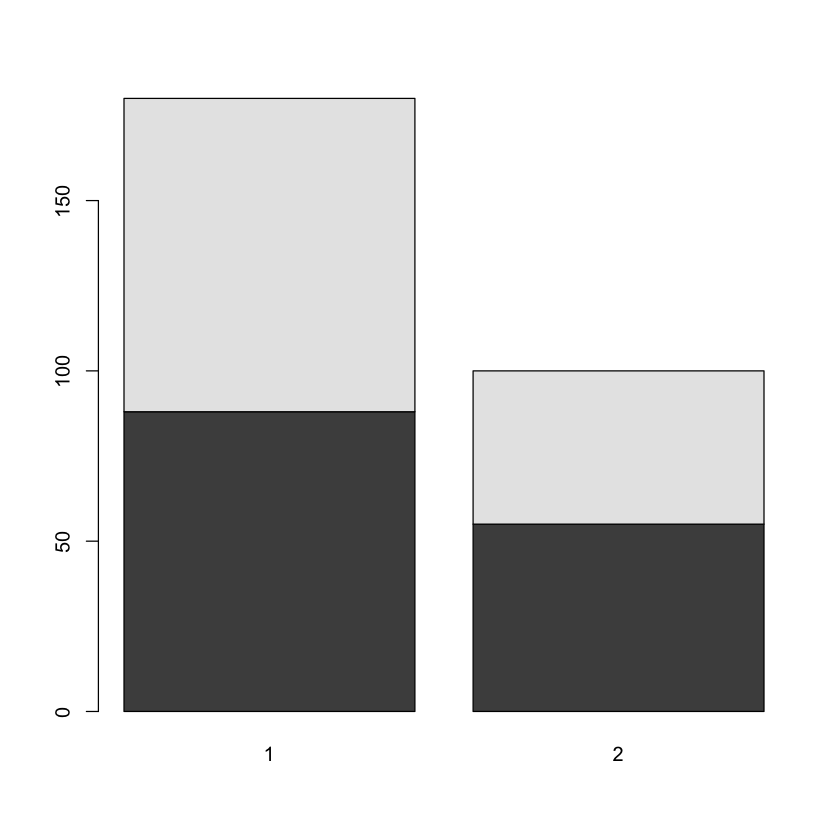

In [31]:
table_cohort_sex <- table(clinical_data$COHORT, clinical_data$SEX)
barplot(table_cohort_sex)
chisq.test(clinical_data$COHORT, clinical_data$SEX)


	Kruskal-Wallis rank sum test

data:  AGE by COHORT
Kruskal-Wallis chi-squared = 42.838, df = 1, p-value = 5.947e-11


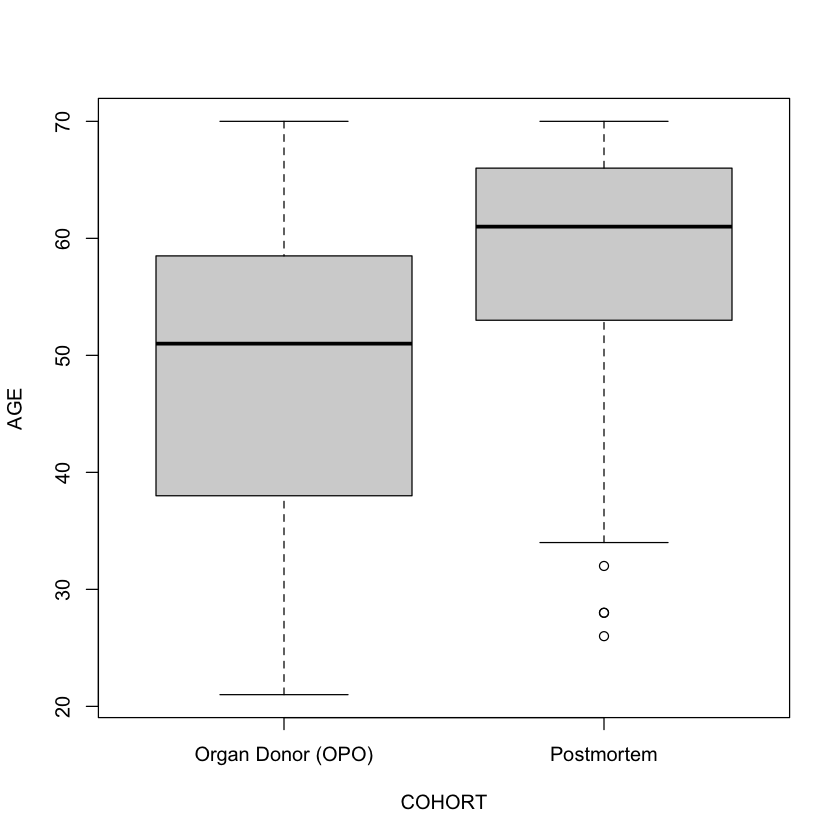

In [32]:
boxplot(AGE ~ COHORT, data=clinical_data)
kruskal.test(AGE ~ COHORT, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  HGHT by COHORT
Kruskal-Wallis chi-squared = 4.7196, df = 1, p-value = 0.02982


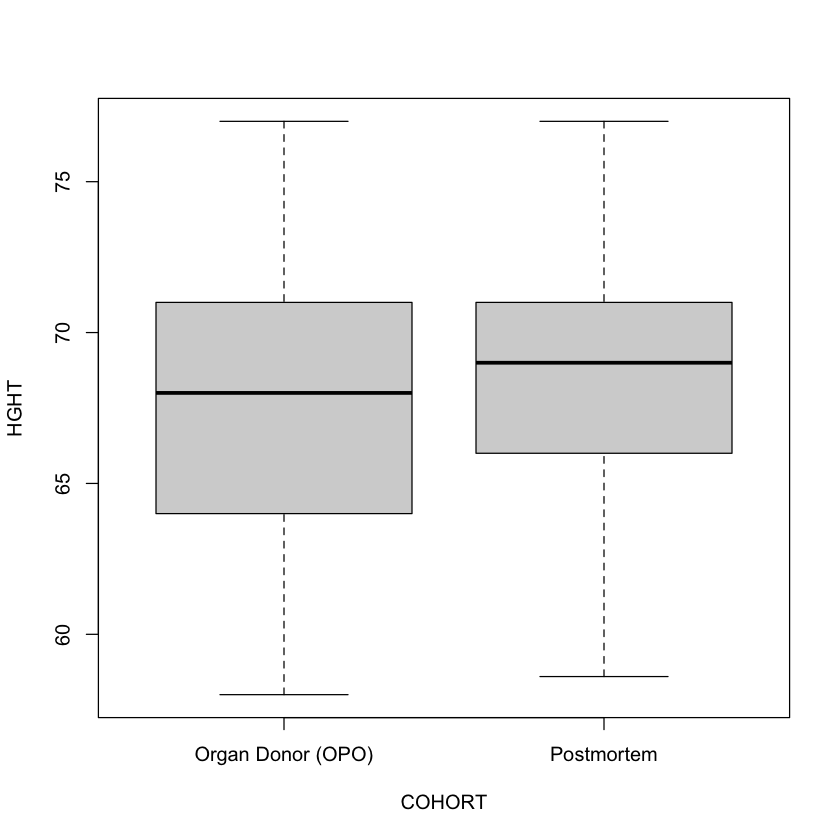

In [33]:
boxplot(HGHT ~ COHORT, data=clinical_data)
kruskal.test(HGHT ~ COHORT, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  WGHT by COHORT
Kruskal-Wallis chi-squared = 4.1733, df = 1, p-value = 0.04107


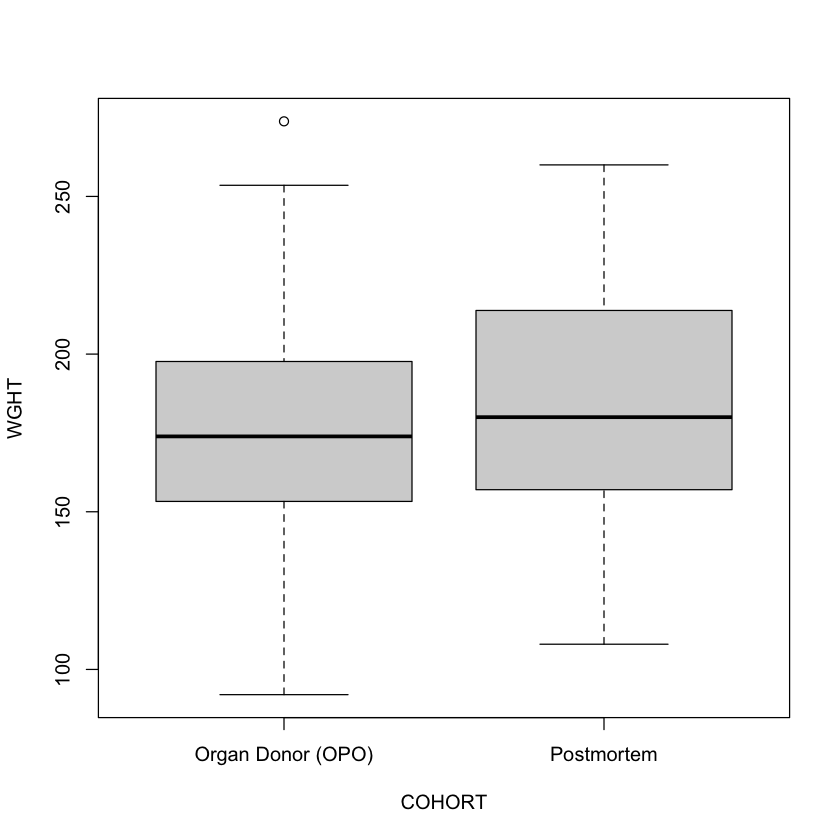

In [34]:
boxplot(WGHT ~ COHORT, data=clinical_data)
kruskal.test(WGHT ~ COHORT, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  BMI by COHORT
Kruskal-Wallis chi-squared = 0.30004, df = 1, p-value = 0.5839


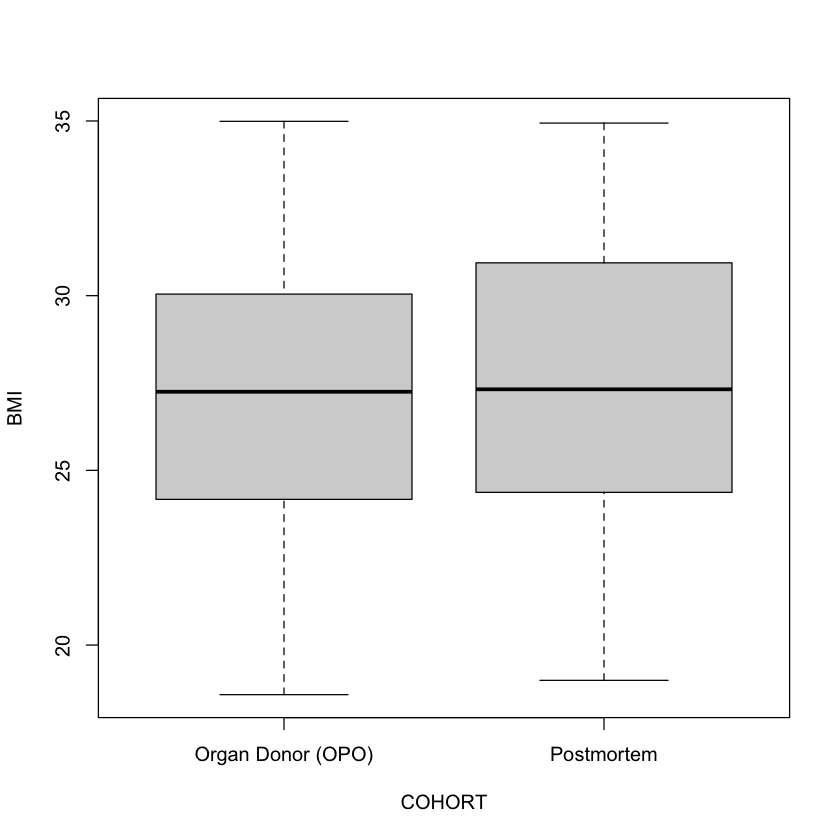

In [35]:
boxplot(BMI ~ COHORT, data=clinical_data)
kruskal.test(BMI ~ COHORT, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  TRISCHD by COHORT
Kruskal-Wallis chi-squared = 173.68, df = 1, p-value < 2.2e-16


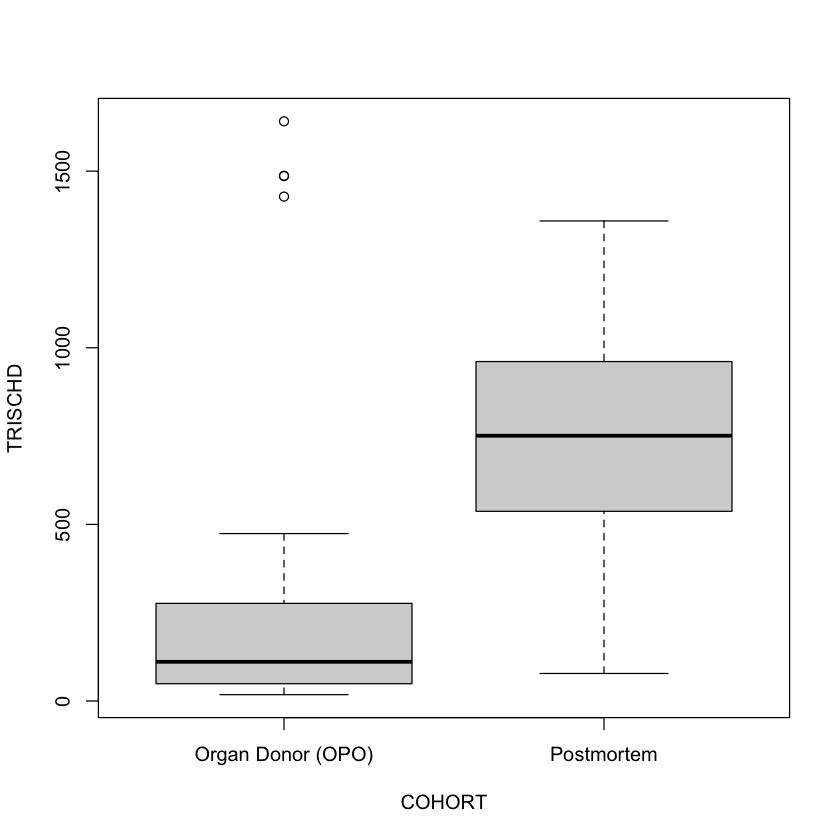

In [36]:
boxplot(TRISCHD ~ COHORT, data=clinical_data)
kruskal.test(TRISCHD ~ COHORT, data=clinical_data)


	Fisher's Exact Test for Count Data

data:  clinical_data$DTHHRDY and clinical_data$COHORT
p-value < 2.2e-16
alternative hypothesis: two.sided


Warning message in chisq.test(clinical_data$DTHHRDY, clinical_data$COHORT):
“L’approximation du Chi-2 est peut-être incorrecte”



	Pearson's Chi-squared test

data:  clinical_data$DTHHRDY and clinical_data$COHORT
X-squared = 225.5, df = 4, p-value < 2.2e-16


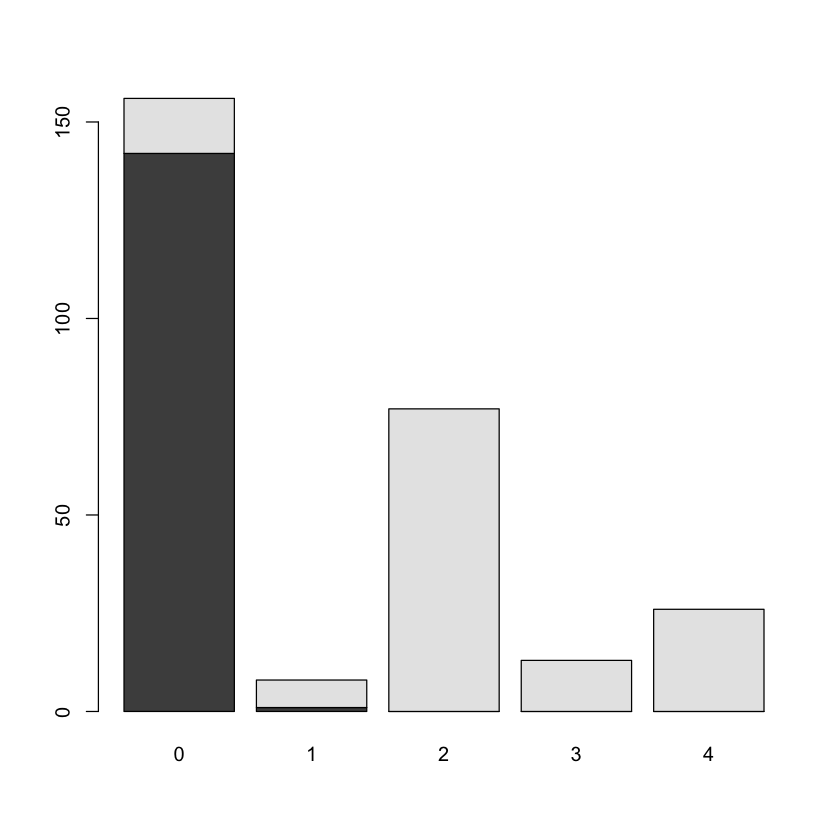

In [45]:
table_cohort_sex <- table(clinical_data$COHORT, clinical_data$DTHHRDY)
barplot(table_cohort_sex)
fisher.test(clinical_data$DTHHRDY, clinical_data$COHORT)
chisq.test(clinical_data$DTHHRDY, clinical_data$COHORT)


	Kruskal-Wallis rank sum test

data:  AGE by SEX
Kruskal-Wallis chi-squared = 1.9821, df = 1, p-value = 0.1592


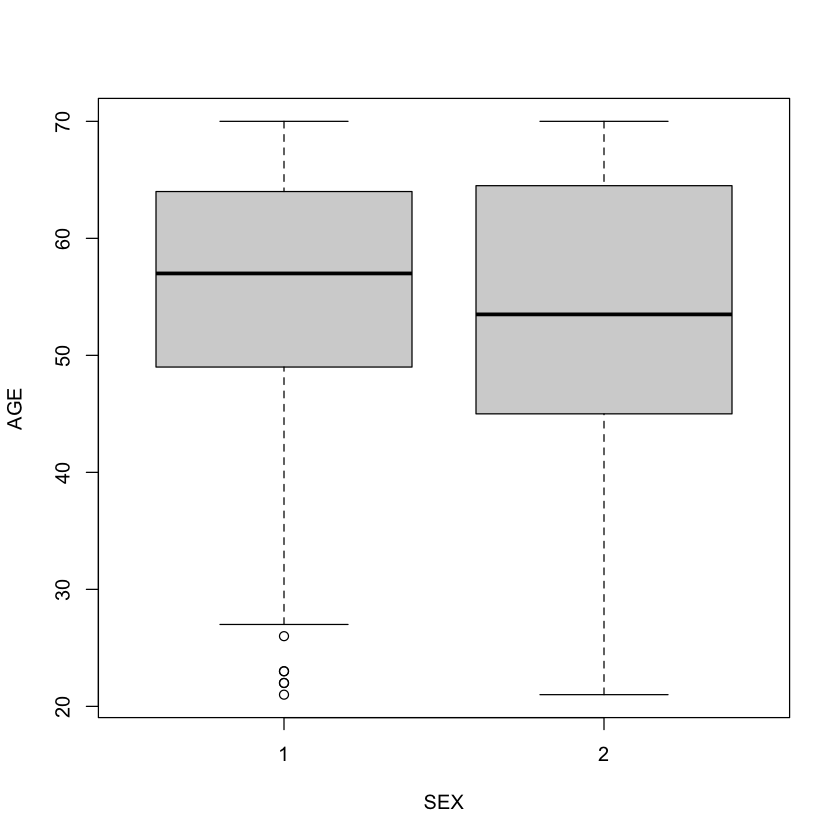

In [49]:
kruskal.test(AGE ~ SEX, data=clinical_data)
boxplot(AGE ~ SEX, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  HGHT by SEX
Kruskal-Wallis chi-squared = 147.65, df = 1, p-value < 2.2e-16


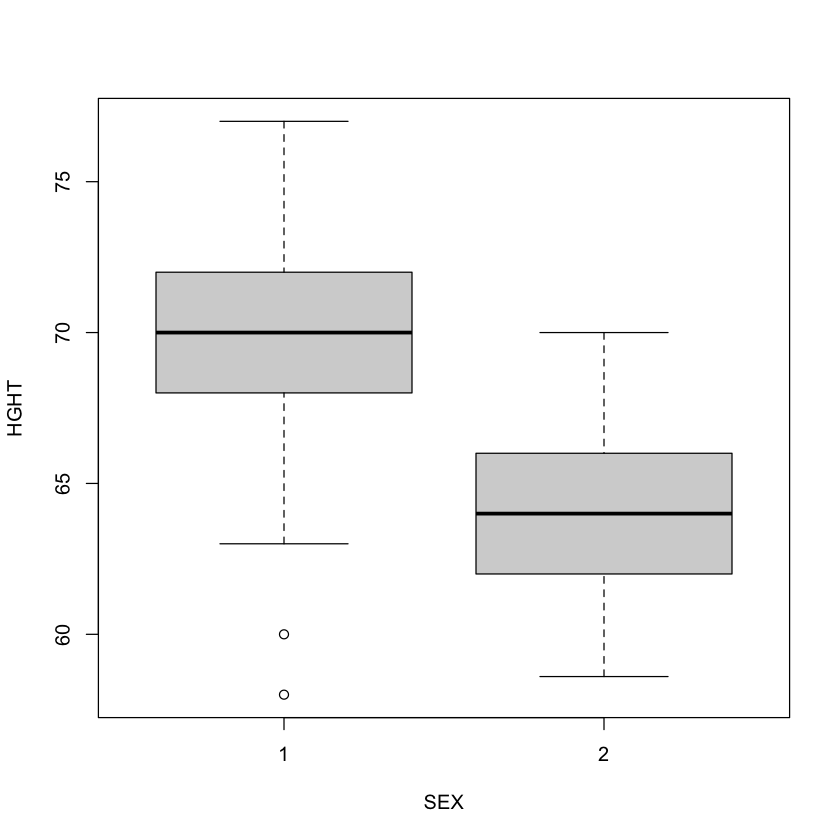

In [50]:
kruskal.test(HGHT ~ SEX, data=clinical_data)
boxplot(HGHT ~ SEX, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  WGHT by SEX
Kruskal-Wallis chi-squared = 65.369, df = 1, p-value = 6.21e-16


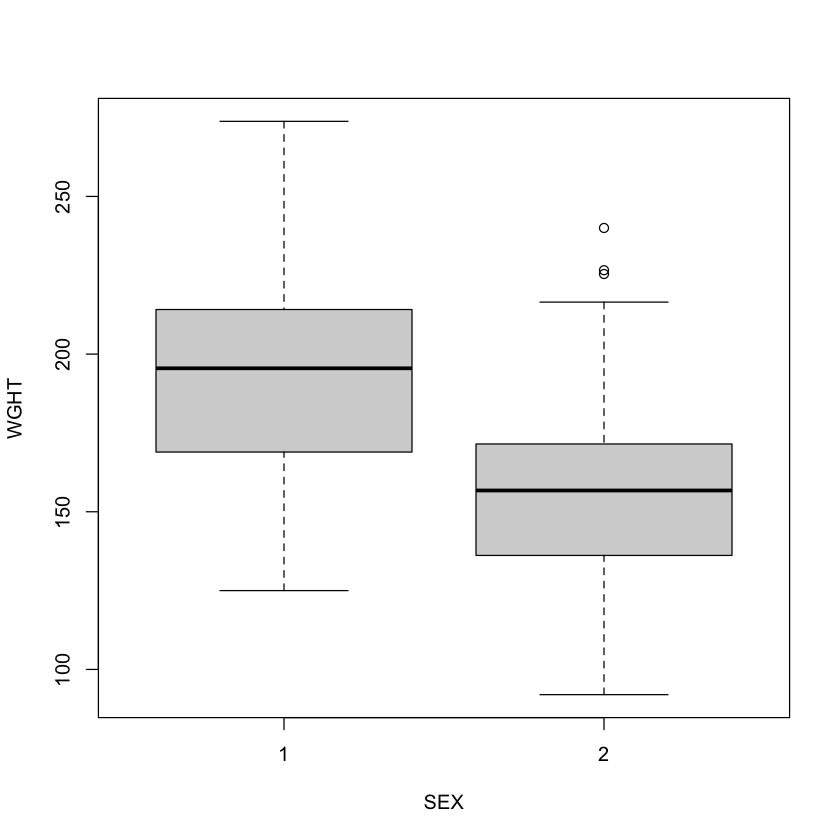

In [51]:
kruskal.test(WGHT ~ SEX, data=clinical_data)
boxplot(WGHT ~ SEX, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  BMI by SEX
Kruskal-Wallis chi-squared = 1.089, df = 1, p-value = 0.2967


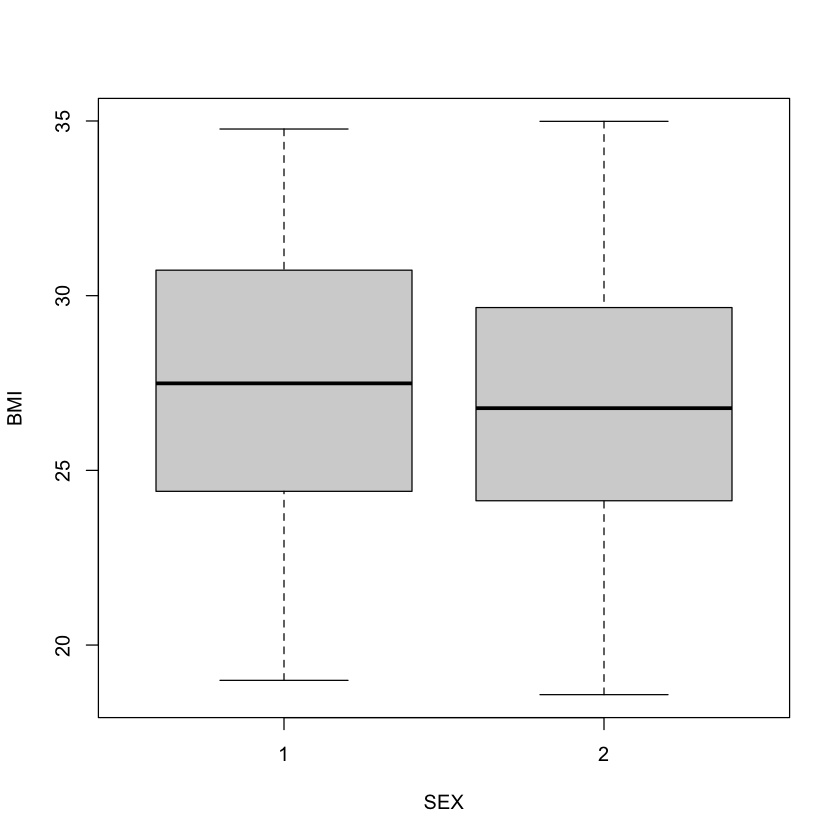

In [52]:
kruskal.test(BMI ~ SEX, data=clinical_data)
boxplot(BMI ~ SEX, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  TRISCHD by SEX
Kruskal-Wallis chi-squared = 2.5489, df = 1, p-value = 0.1104


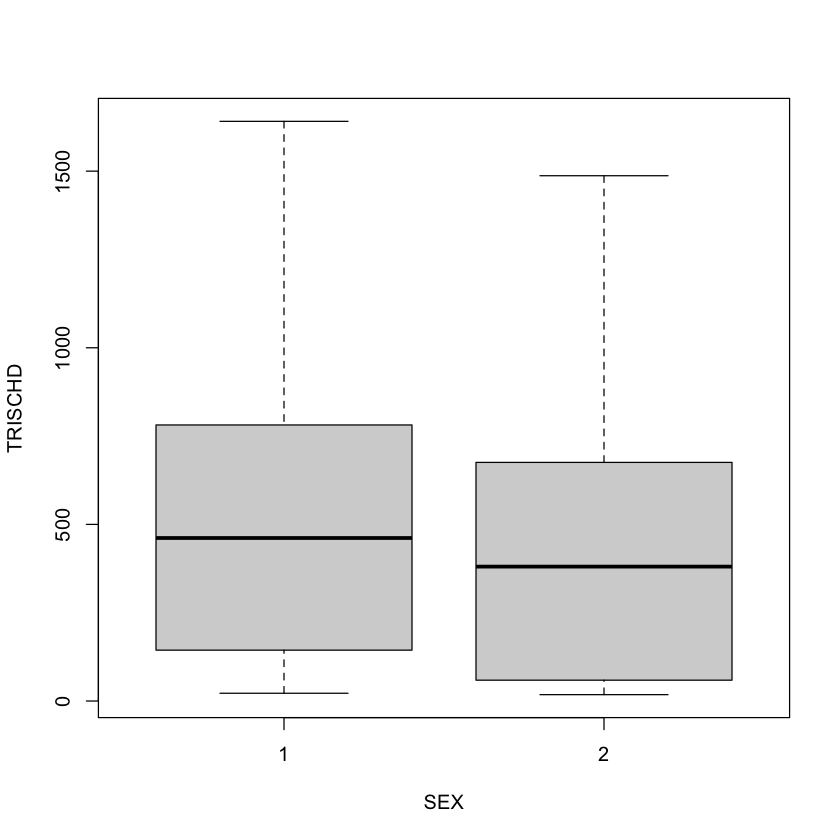

In [53]:
kruskal.test(TRISCHD ~ SEX, data=clinical_data)
boxplot(TRISCHD ~ SEX, data=clinical_data)


	Fisher's Exact Test for Count Data

data:  clinical_data$DTHHRDY and clinical_data$SEX
p-value = 0.008351
alternative hypothesis: two.sided


Warning message in chisq.test(clinical_data$DTHHRDY, clinical_data$SEX):
“L’approximation du Chi-2 est peut-être incorrecte”



	Pearson's Chi-squared test

data:  clinical_data$DTHHRDY and clinical_data$SEX
X-squared = 13.111, df = 4, p-value = 0.01075


   
     0  1  2  3  4
  1 96  3 60  9 12
  2 60  5 17  4 14

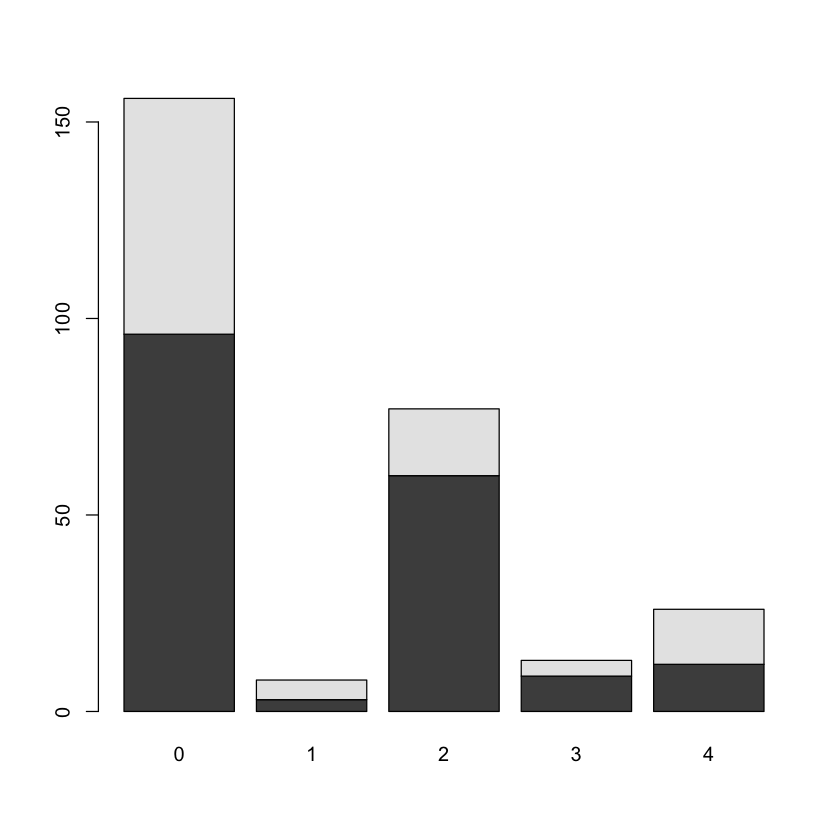

In [55]:
table_sex_dthhrdy <- table(clinical_data$SEX, clinical_data$DTHHRDY)
barplot(table_sex_dthhrdy)
fisher.test(clinical_data$DTHHRDY, clinical_data$SEX)
chisq.test(clinical_data$DTHHRDY, clinical_data$SEX)

table_sex_dthhrdy

[1] 0.06408926


Call:
lm(formula = HGHT ~ AGE, data = clinical_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5171 -2.6205  0.1768  3.1768  9.1059 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 66.75923    1.04283  64.017   <2e-16 ***
AGE          0.02027    0.01893   1.071    0.285    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.995 on 278 degrees of freedom
Multiple R-squared:  0.004107,	Adjusted R-squared:  0.0005251 
F-statistic: 1.147 on 1 and 278 DF,  p-value: 0.2852


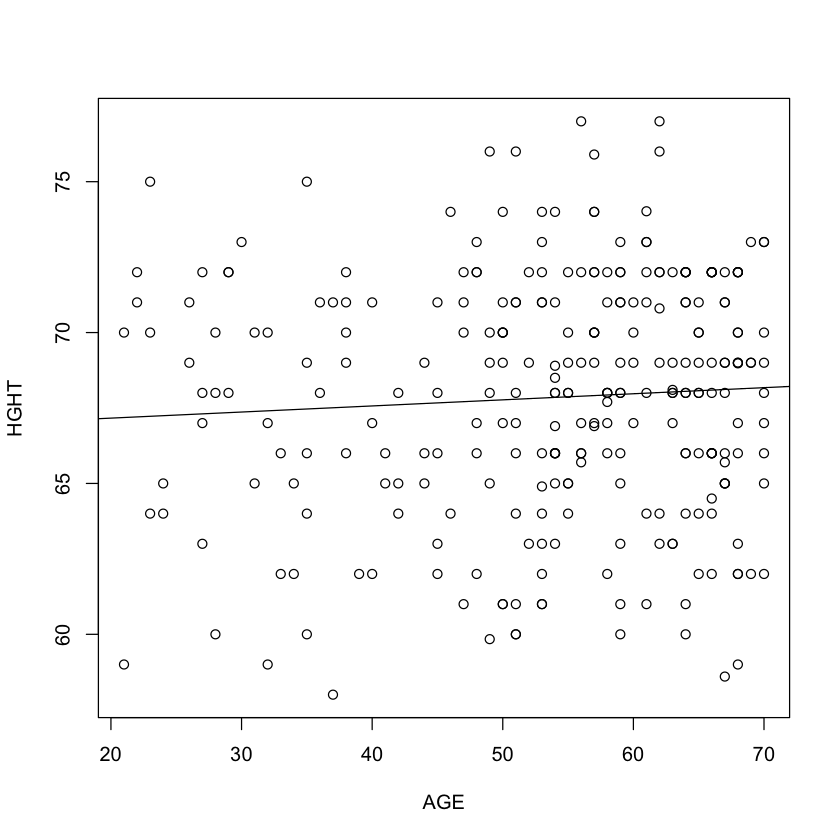

In [59]:
plot(HGHT ~ AGE, data=clinical_data)
cor(clinical_data$AGE, clinical_data$HGHT)
lr_hght_age <- lm(HGHT ~ AGE, data=clinical_data)
summary(lr_hght_age)
abline(lr_hght_age)

[1] 0.0973484


Call:
lm(formula = WGHT ~ AGE, data = clinical_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.035 -25.438  -2.034  24.447  94.808 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 165.6617     8.8401  18.740   <2e-16 ***
AGE           0.2617     0.1604   1.631    0.104    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.86 on 278 degrees of freedom
Multiple R-squared:  0.009477,	Adjusted R-squared:  0.005914 
F-statistic:  2.66 on 1 and 278 DF,  p-value: 0.1041


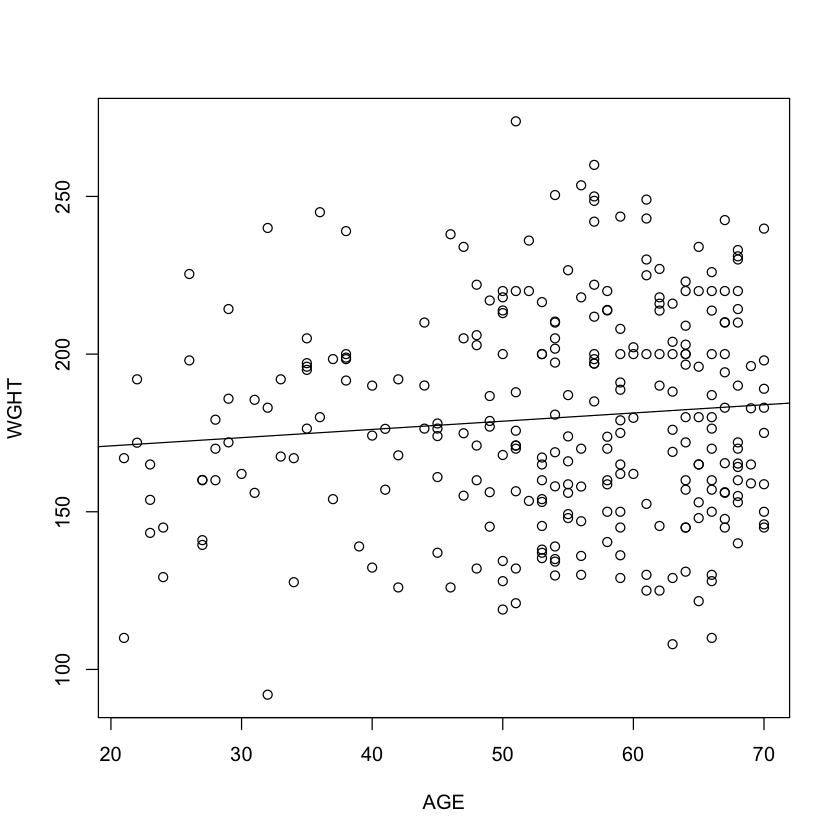

In [60]:
plot(WGHT ~ AGE, data=clinical_data)
cor(clinical_data$AGE, clinical_data$WGHT)
lr_wght_age <- lm(WGHT ~ AGE, data=clinical_data)
summary(lr_wght_age)
abline(lr_wght_age)

[1] 0.07113191


Call:
lm(formula = BMI ~ AGE, data = clinical_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6911 -3.0794  0.0282  3.2957  8.2249 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26.12388    1.06119  24.618   <2e-16 ***
AGE          0.02290    0.01926   1.189    0.235    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.065 on 278 degrees of freedom
Multiple R-squared:  0.00506,	Adjusted R-squared:  0.001481 
F-statistic: 1.414 on 1 and 278 DF,  p-value: 0.2354


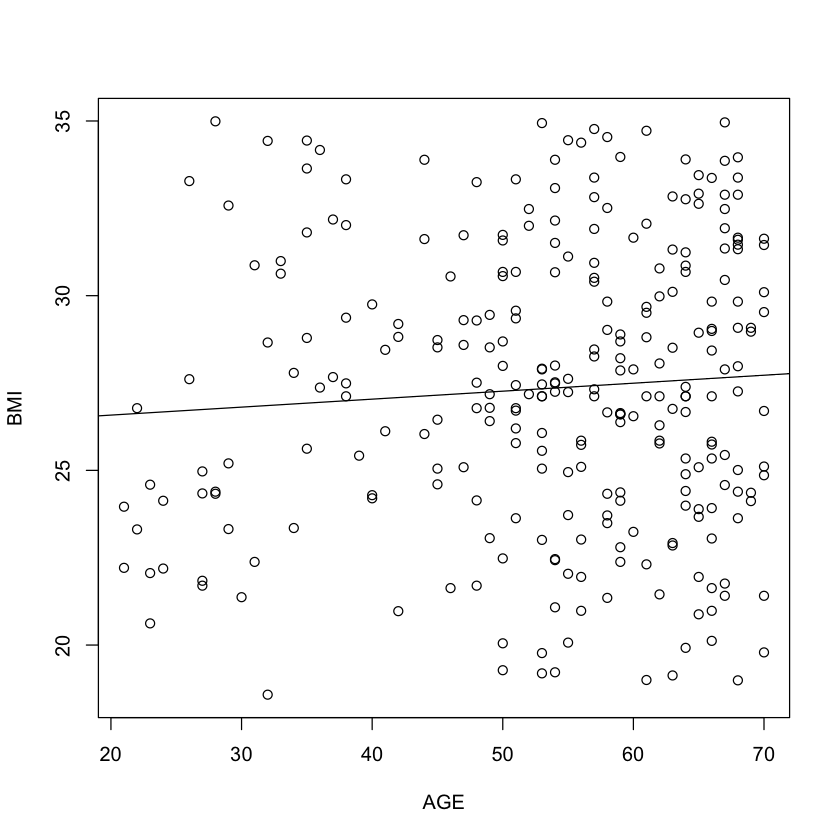

In [61]:
plot(BMI ~ AGE, data=clinical_data)
cor(clinical_data$AGE, clinical_data$BMI)
lr_bmi_age <- lm(BMI ~ AGE, data=clinical_data)
summary(lr_bmi_age)
abline(lr_bmi_age)

[1] 0.2292725


Call:
lm(formula = TRISCHD ~ AGE, data = clinical_data)

Residuals:
   Min     1Q Median     3Q    Max 
-561.5 -304.6  -54.3  237.1 1339.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   96.369     99.427   0.969 0.333264    
AGE            7.087      1.805   3.927 0.000108 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 380.9 on 278 degrees of freedom
Multiple R-squared:  0.05257,	Adjusted R-squared:  0.04916 
F-statistic: 15.42 on 1 and 278 DF,  p-value: 0.0001084


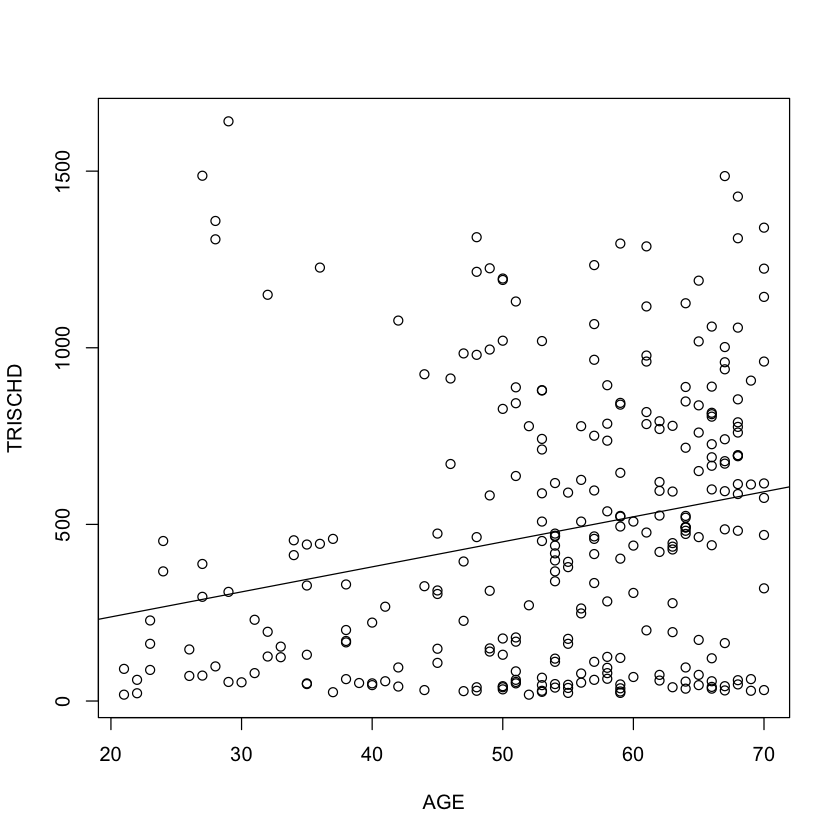

In [62]:
plot(TRISCHD ~ AGE, data=clinical_data)
cor(clinical_data$AGE, clinical_data$TRISCHD)
lr_trischd_age <- lm(TRISCHD ~ AGE, data=clinical_data)
summary(lr_trischd_age)
abline(lr_trischd_age)


	Kruskal-Wallis rank sum test

data:  AGE by DTHHRDY
Kruskal-Wallis chi-squared = 53.759, df = 4, p-value = 5.912e-11


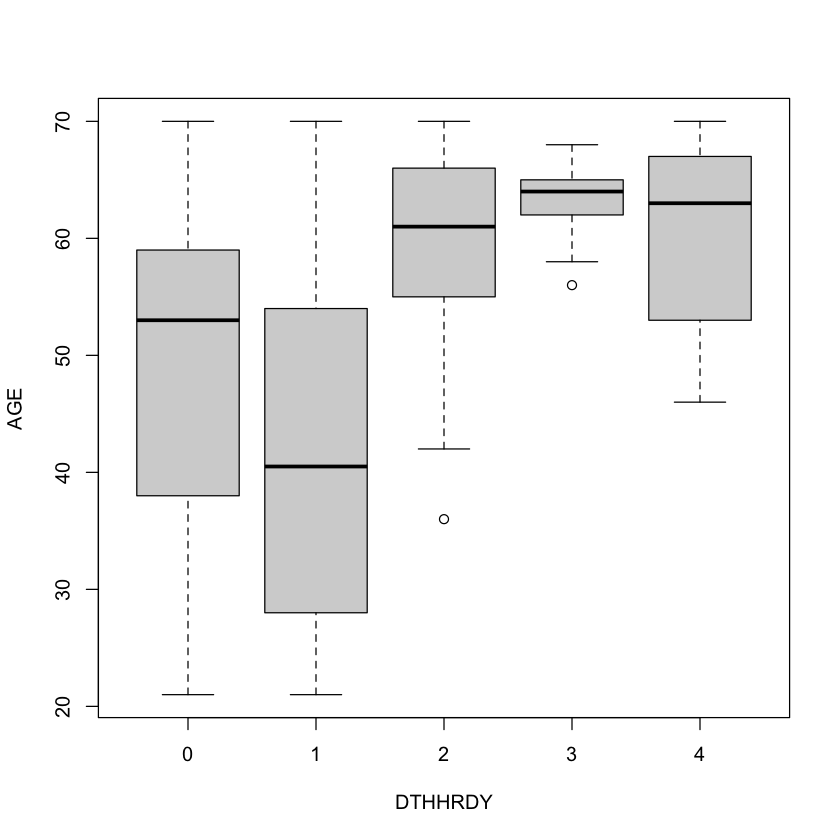

In [63]:
boxplot(AGE ~ DTHHRDY, data=clinical_data)
kruskal.test(AGE ~ DTHHRDY, data=clinical_data)

[1] 0.6121418


Call:
lm(formula = WGHT ~ HGHT, data = clinical_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.309 -20.419  -0.801  21.957  52.894 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -173.3221    27.3974  -6.326    1e-09 ***
HGHT           5.2032     0.4031  12.907   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.91 on 278 degrees of freedom
Multiple R-squared:  0.3747,	Adjusted R-squared:  0.3725 
F-statistic: 166.6 on 1 and 278 DF,  p-value: < 2.2e-16


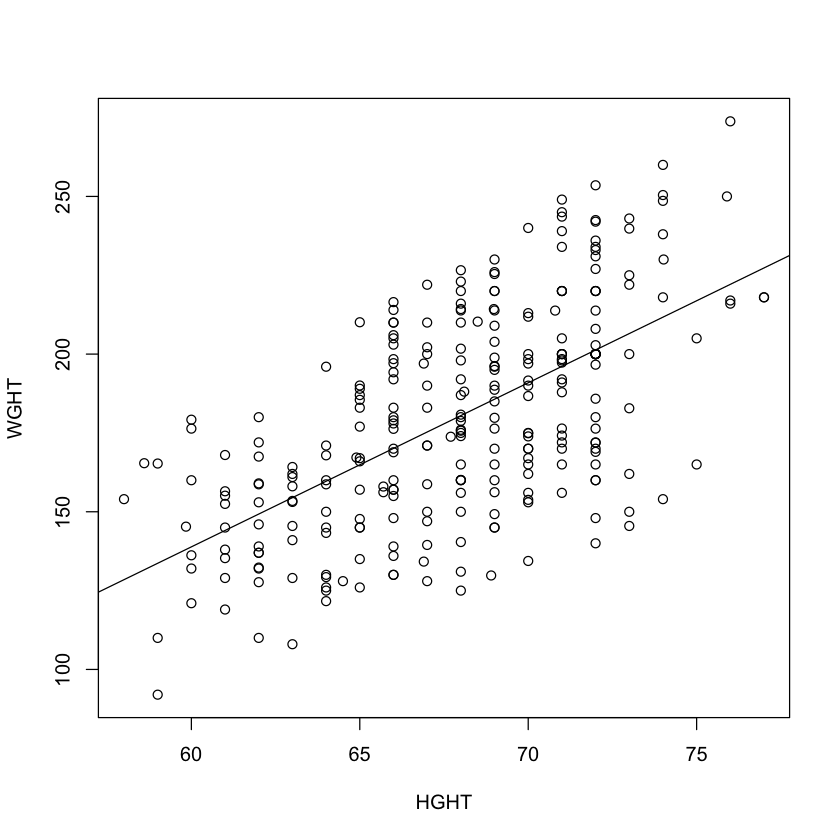

In [65]:
plot(WGHT ~ HGHT, data=clinical_data)
cor(clinical_data$HGHT, clinical_data$WGHT)
lr_hght_wght <- lm(WGHT ~ HGHT, data=clinical_data)
summary(lr_hght_wght)
abline(lr_hght_wght)

[1] -0.006819023


Call:
lm(formula = BMI ~ HGHT, data = clinical_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8336 -3.0232 -0.0507  3.3266  7.5881 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 27.823158   4.149821   6.705 1.12e-10 ***
HGHT        -0.006942   0.061060  -0.114     0.91    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.075 on 278 degrees of freedom
Multiple R-squared:  4.65e-05,	Adjusted R-squared:  -0.00355 
F-statistic: 0.01293 on 1 and 278 DF,  p-value: 0.9096


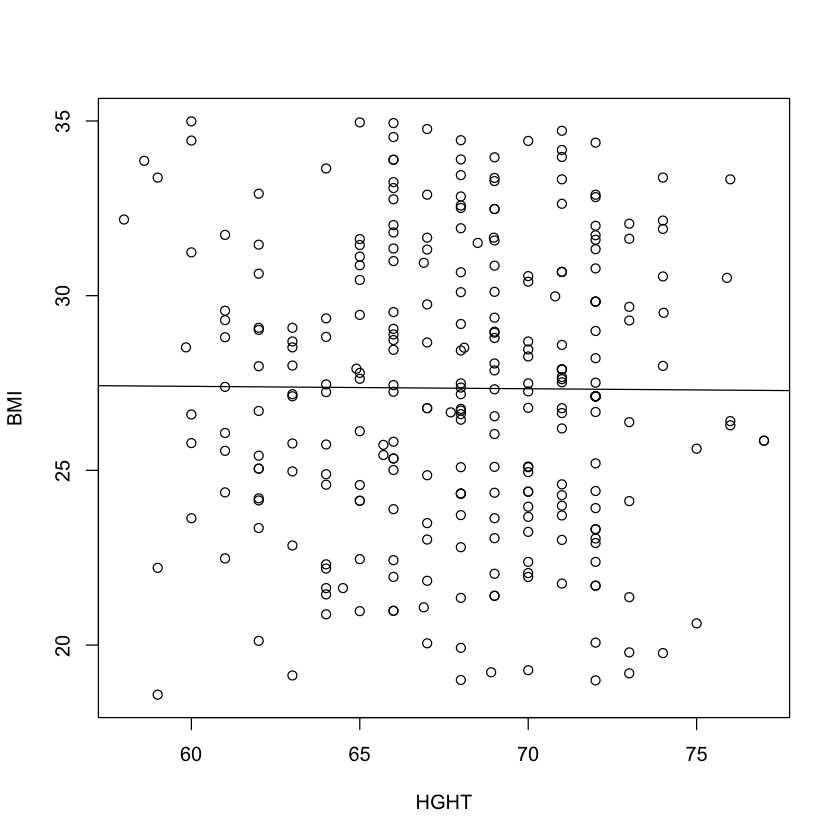

In [66]:
plot(BMI ~ HGHT, data=clinical_data)
cor(clinical_data$HGHT, clinical_data$BMI)
lr_hght_bmi <- lm(BMI ~ HGHT, data=clinical_data)
summary(lr_hght_bmi)
abline(lr_hght_bmi)

[1] 0.1439052


Call:
lm(formula = TRISCHD ~ HGHT, data = clinical_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-537.05 -347.35  -45.51  278.14 1106.09 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -477.902    394.302  -1.212    0.227  
HGHT          14.067      5.802   2.425    0.016 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 387.2 on 278 degrees of freedom
Multiple R-squared:  0.02071,	Adjusted R-squared:  0.01719 
F-statistic: 5.879 on 1 and 278 DF,  p-value: 0.01596


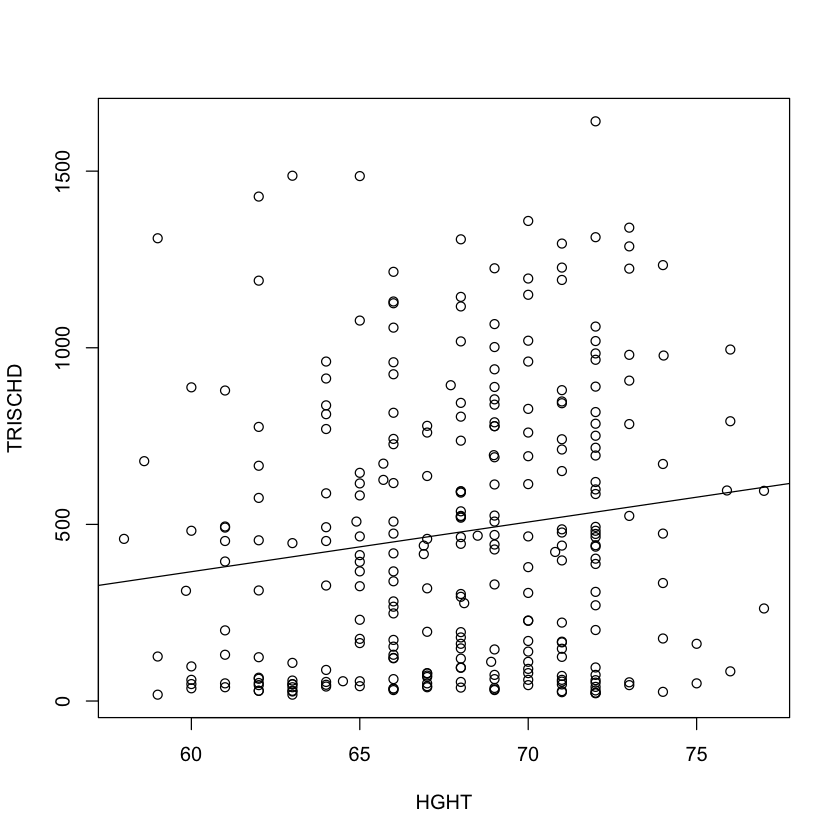

In [68]:
plot(TRISCHD ~ HGHT, data=clinical_data)
cor(clinical_data$HGHT, clinical_data$TRISCHD)
lr_hght_trischd <- lm(TRISCHD ~ HGHT, data=clinical_data)
summary(lr_hght_trischd)
abline(lr_hght_trischd)


	Kruskal-Wallis rank sum test

data:  HGHT by DTHHRDY
Kruskal-Wallis chi-squared = 12.113, df = 4, p-value = 0.01653


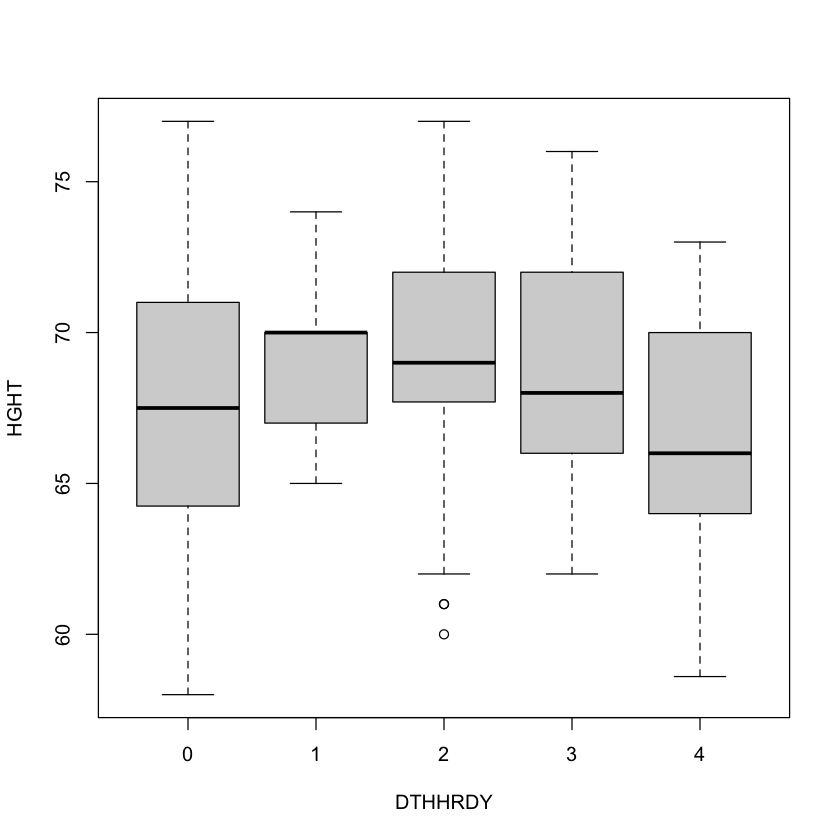

In [69]:
boxplot(HGHT ~ DTHHRDY, data=clinical_data)
kruskal.test(HGHT ~ DTHHRDY, data=clinical_data)

[1] 0.7809451


Call:
lm(formula = BMI ~ WGHT, data = clinical_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3575 -1.8296 -0.3186  1.7003  7.8451 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.543737   0.820505   12.85   <2e-16 ***
WGHT         0.093538   0.004487   20.85   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.546 on 278 degrees of freedom
Multiple R-squared:  0.6099,	Adjusted R-squared:  0.6085 
F-statistic: 434.6 on 1 and 278 DF,  p-value: < 2.2e-16


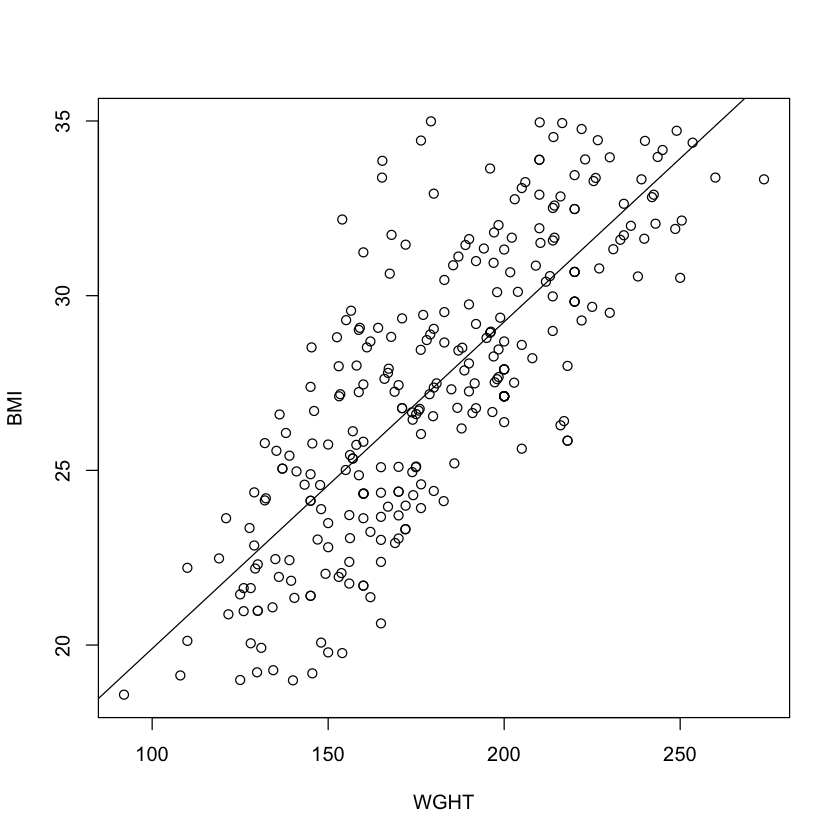

In [70]:
plot(BMI ~ WGHT, data=clinical_data)
cor(clinical_data$WGHT, clinical_data$BMI)
lr_bmi_wght <- lm(BMI ~ WGHT, data=clinical_data)
summary(lr_bmi_wght)
abline(lr_bmi_wght)

[1] 0.1191393


Call:
lm(formula = TRISCHD ~ WGHT, data = clinical_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-532.53 -353.84  -52.07  250.90 1175.06 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 230.2781   125.2302   1.839   0.0670 .
WGHT          1.3701     0.6848   2.001   0.0464 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 388.5 on 278 degrees of freedom
Multiple R-squared:  0.01419,	Adjusted R-squared:  0.01065 
F-statistic: 4.003 on 1 and 278 DF,  p-value: 0.0464


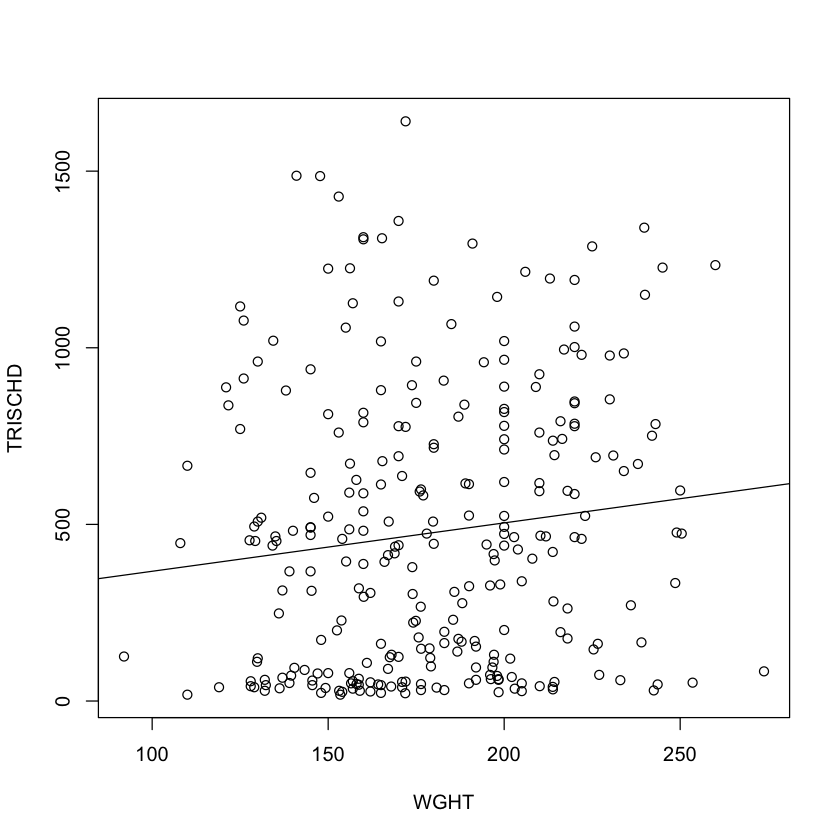

In [71]:
plot(TRISCHD ~ WGHT, data=clinical_data)
cor(clinical_data$WGHT, clinical_data$TRISCHD)
lr_trischd_wght <- lm(TRISCHD ~ WGHT, data=clinical_data)
summary(lr_trischd_wght)
abline(lr_trischd_wght)


	Kruskal-Wallis rank sum test

data:  WGHT by DTHHRDY
Kruskal-Wallis chi-squared = 6.6293, df = 4, p-value = 0.1568


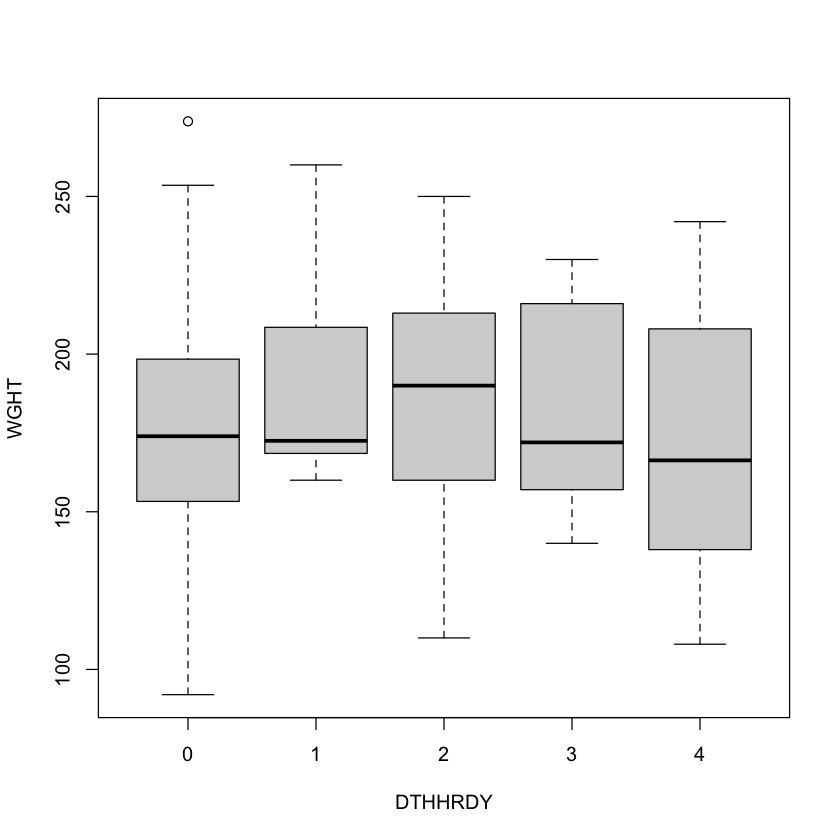

In [72]:
boxplot(WGHT ~ DTHHRDY, data=clinical_data)
kruskal.test(WGHT ~ DTHHRDY, data=clinical_data)

[1] 0.03324977


Call:
lm(formula = TRISCHD ~ BMI, data = clinical_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-464.16 -372.82  -32.42  285.46 1177.39 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  389.162    159.147   2.445   0.0151 *
BMI            3.192      5.755   0.555   0.5796  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 391.1 on 278 degrees of freedom
Multiple R-squared:  0.001106,	Adjusted R-squared:  -0.002488 
F-statistic: 0.3077 on 1 and 278 DF,  p-value: 0.5796


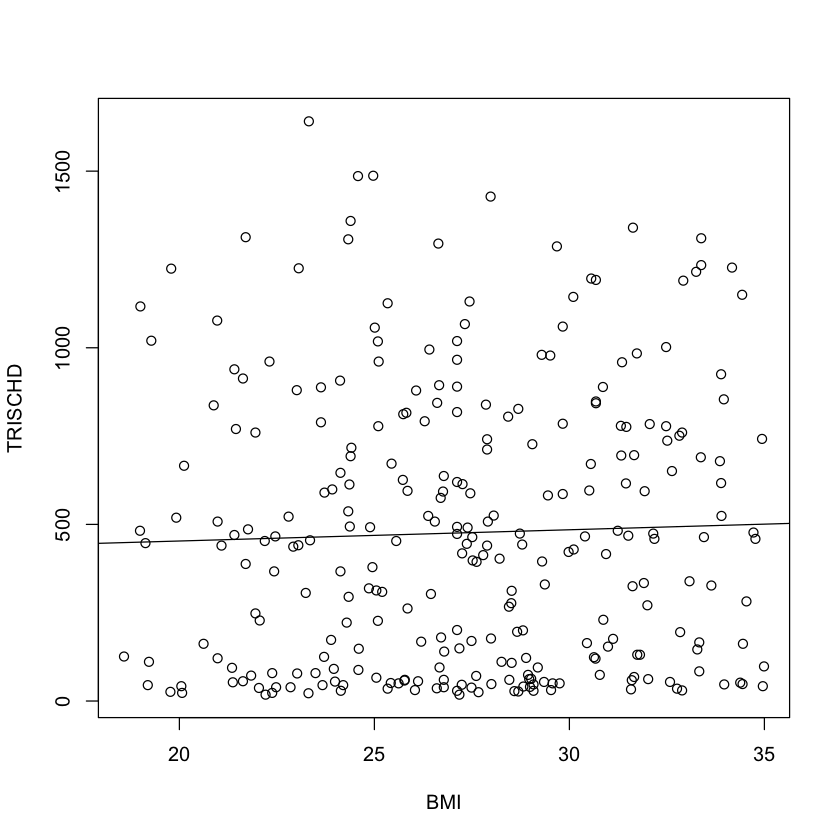

In [74]:
plot(TRISCHD ~ BMI, data=clinical_data)
cor(clinical_data$BMI, clinical_data$TRISCHD)
lr_trischd_bmi <- lm(TRISCHD ~ BMI, data=clinical_data)
summary(lr_trischd_bmi)
abline(lr_trischd_bmi)


	Kruskal-Wallis rank sum test

data:  BMI by DTHHRDY
Kruskal-Wallis chi-squared = 0.085412, df = 4, p-value = 0.9991


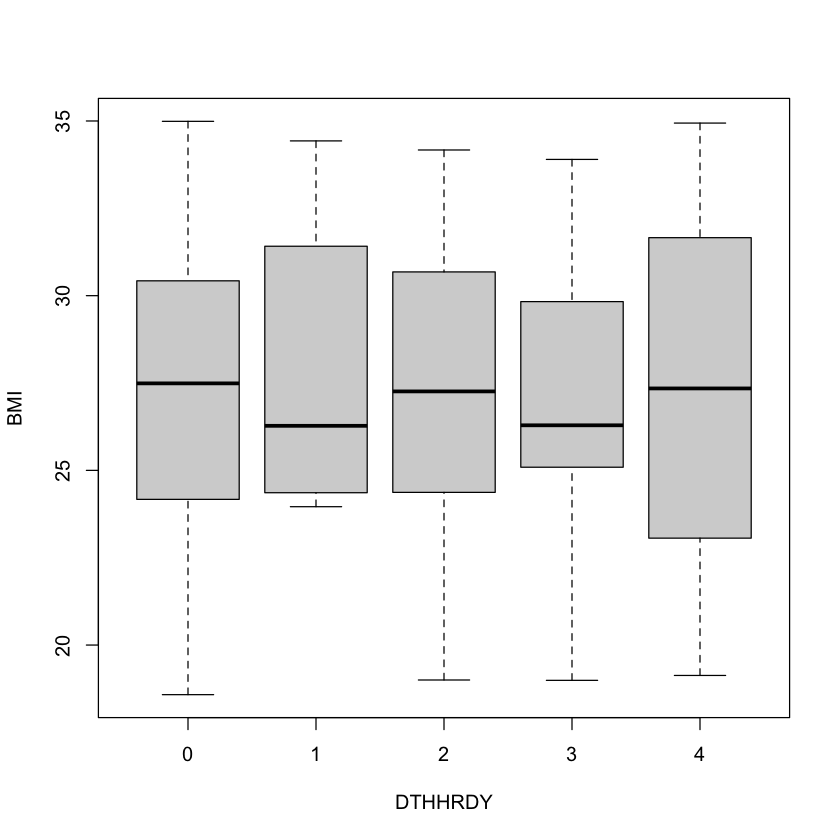

In [73]:
boxplot(BMI ~ DTHHRDY, data=clinical_data)
kruskal.test(BMI ~ DTHHRDY, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  TRISCHD by DTHHRDY
Kruskal-Wallis chi-squared = 176.5, df = 4, p-value < 2.2e-16


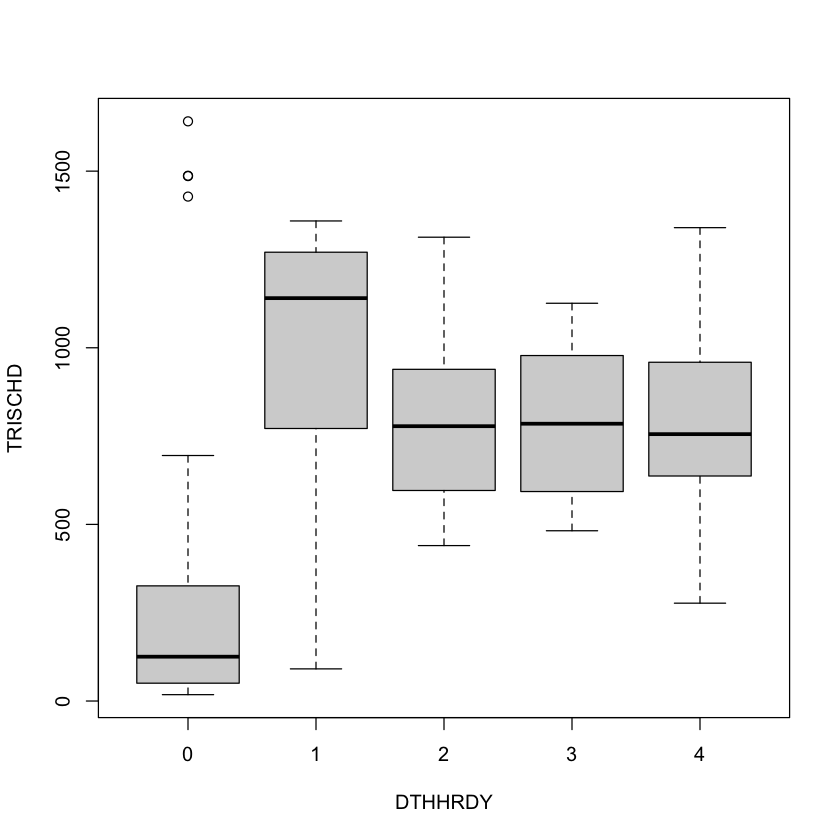

In [76]:
boxplot(TRISCHD ~ DTHHRDY, data=clinical_data)
kruskal.test(TRISCHD ~ DTHHRDY, data=clinical_data)

In [ ]:
#----------------------

In [27]:
100*length(clinical_data$COHORT[clinical_data$COHORT=="Postmortem"])/length(clinical_data$COHORT)
#probably a good idea to convert this variable to a factor


[1] 48.92857

[1] 64.28571

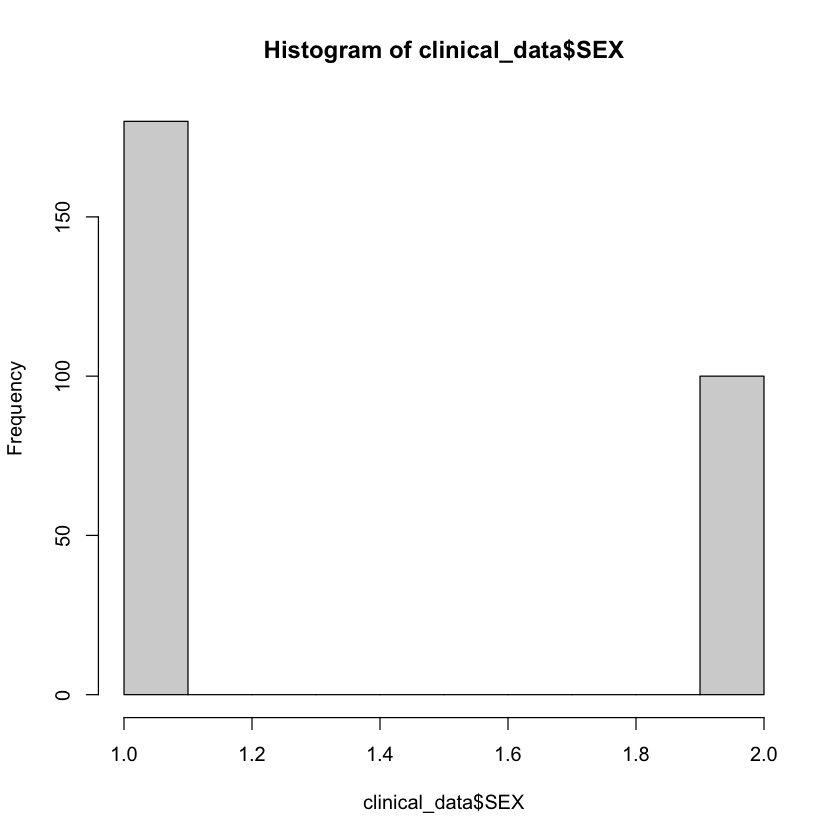

In [15]:
hist(clinical_data$SEX)

100*length(clinical_data$SEX[clinical_data$SEX==1])/length(clinical_data$SEX)
#majority of males (64.3%)

[1] 21

[1] 70

[1] 56

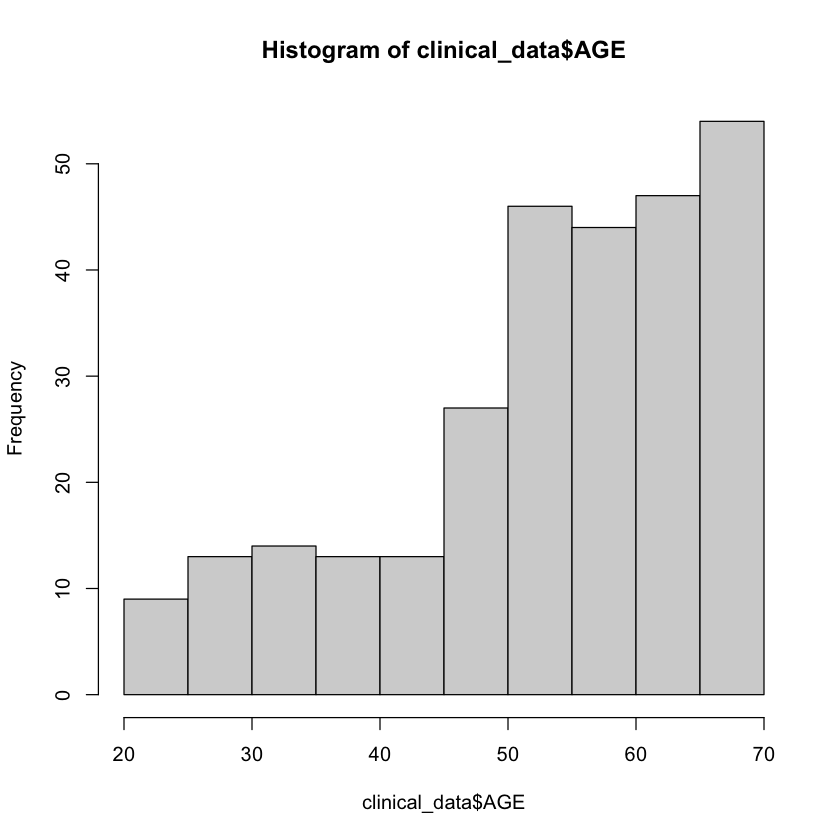

In [29]:
hist(clinical_data$AGE)
min(clinical_data$AGE)
max(clinical_data$AGE)
#commetary : clear over-representation of people in the 50-70 age bracket, 
#minimum : 21 years old, maximum : 70 years olde
median(clinical_data$AGE)

[1] 147.32

[1] 195.58

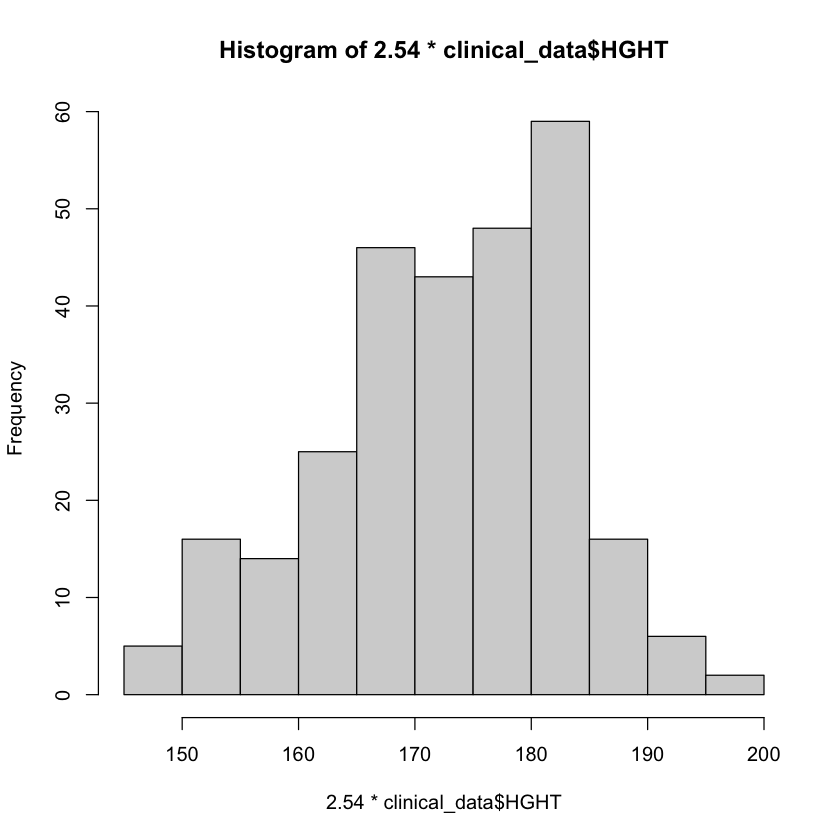

In [18]:
hist(2.54*clinical_data$HGHT)
min(clinical_data$HGHT) * 2.54
max(clinical_data$HGHT) * 2.54
#commetary : by default height measured in inches ! 1 inch = 2.54 centimetes


[1] 41.7305

[1] 124.1999

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  41.73   70.66   80.00   81.51   92.02  124.20 

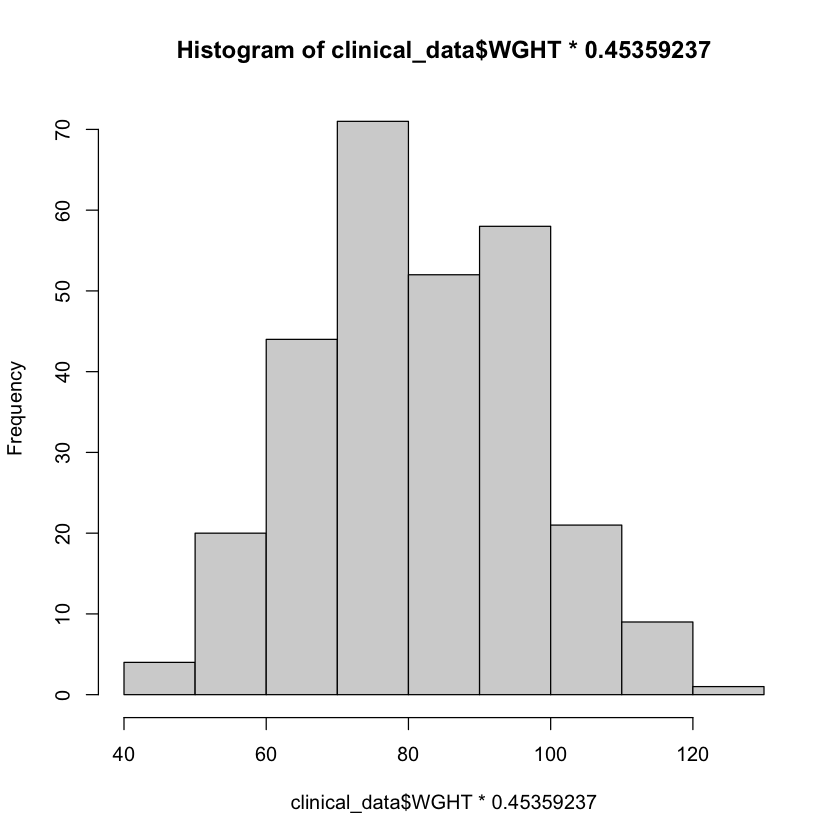

In [39]:
hist(clinical_data$WGHT * 0.45359237 )
min(clinical_data$WGHT) * 0.45359237 
max(clinical_data$WGHT) * 0.45359237 
#commetary : by default weigth measured in pounds ! 1 pound =  0.45359237 kg
summary(clinical_data$WGHT * 0.45359237)

[1] 18.58

[1] 34.99

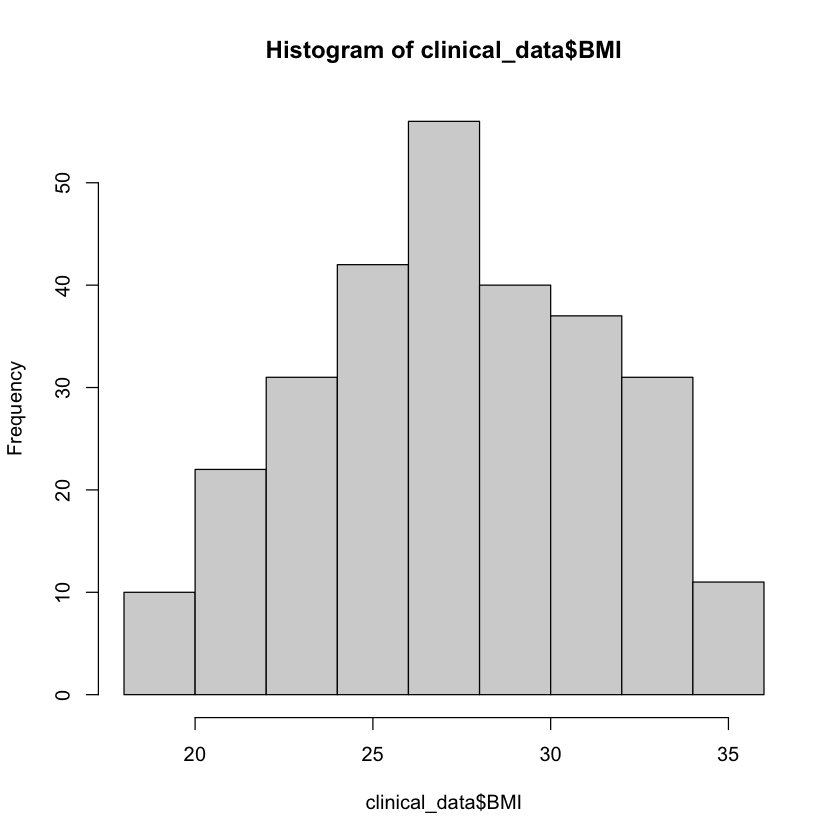

In [22]:
hist(clinical_data$BMI)
min(clinical_data$BMI) 
max(clinical_data$BMI)  

In [28]:
#SMPTHNTS: the sample’s pathology notes taken by GTEx pathologists who examined the histological slices 
#(possibly useful if you want to dive deeper into the project, they found quite few incidental diseases, 
#failed dissection, etc.)

clinical_data$SMPTHNTS

#Uninteresting

[1] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
  [7] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
 [13] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
 [19] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
 [25] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
 [31] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
 [37] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
 [43] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
 [49] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
 [55] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
 [61] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
 [67] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
 [73] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
 [79] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
 [85] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
 [91] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
 [97] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[103] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[109] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[115] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[121] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[127] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[133] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[139] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[145] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[151] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[157] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[163] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[169] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[175] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[181] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[187] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[193] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[199] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[205] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[211] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[217] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[223] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[229] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[235] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[241] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[247] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[253] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[259] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[265] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[271] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"
[277] "NO_REPORT" "NO_REPORT" "NO_REPORT" "NO_REPORT"

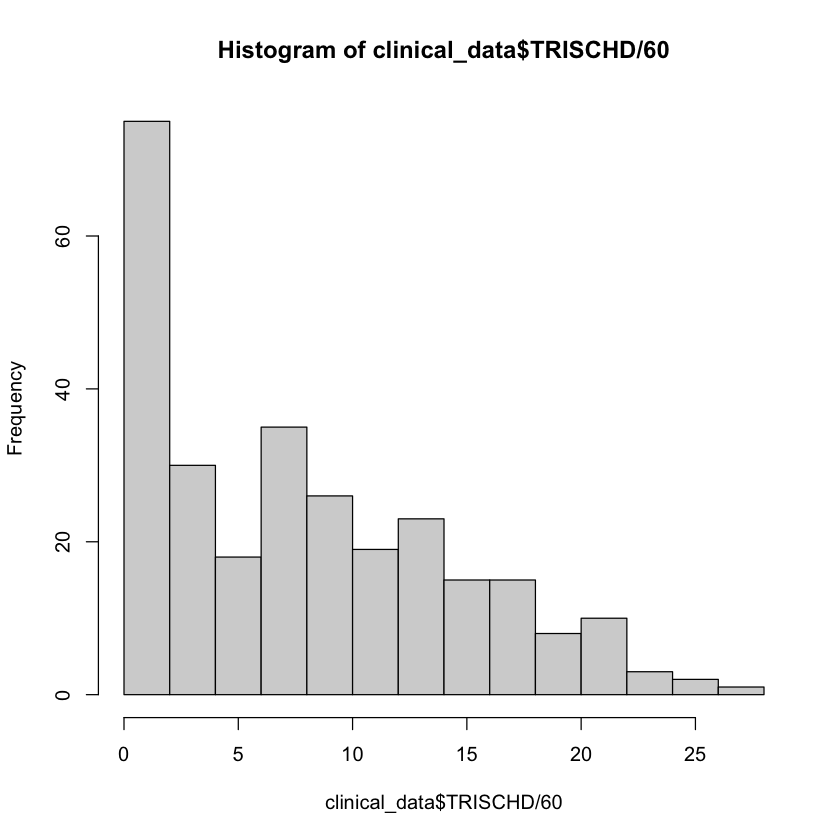

In [31]:
hist(clinical_data$TRISCHD/60) #convert minutes in hours

#quite a lot of low values, but a few very high ones !

[1] 55.71429

[1] 2.857143

[1] 27.5

[1] 4.642857

[1] 9.285714

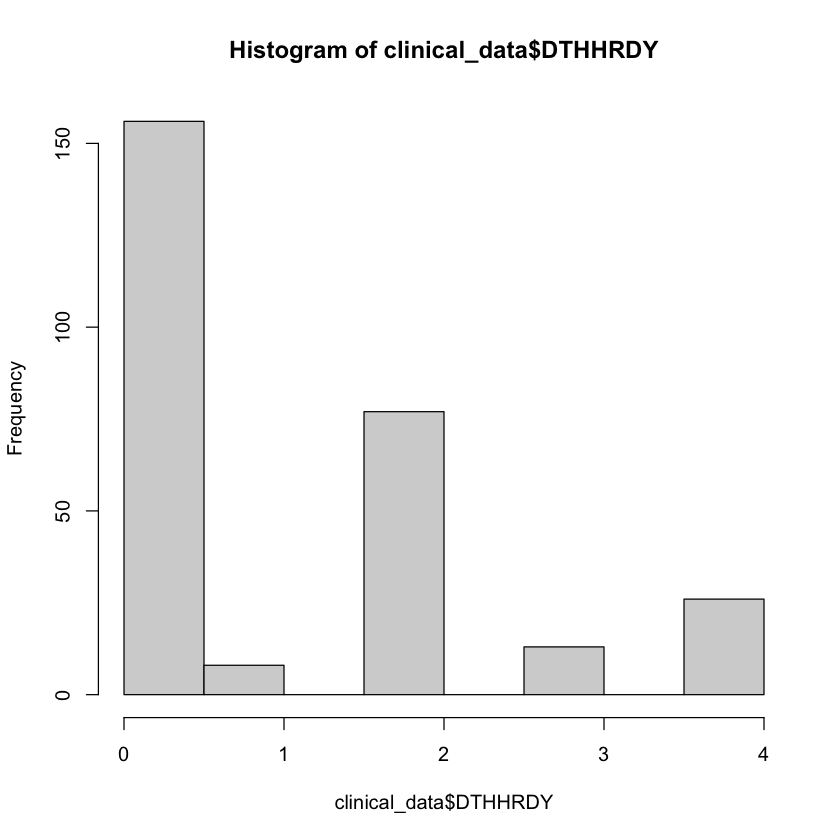

In [34]:
hist(clinical_data$DTHHRDY)
#majority of ventilator case, few violent and fast deaths, intermediate deaths or slow deaths, intermediate number
#of Fast death of natural causes

100*length(clinical_data$DTHHRDY[clinical_data$DTHHRDY==0])/(length(clinical_data$DTHHRDY))
100*length(clinical_data$DTHHRDY[clinical_data$DTHHRDY==1])/(length(clinical_data$DTHHRDY))
100*length(clinical_data$DTHHRDY[clinical_data$DTHHRDY==2])/(length(clinical_data$DTHHRDY))
100*length(clinical_data$DTHHRDY[clinical_data$DTHHRDY==3])/(length(clinical_data$DTHHRDY))
100*length(clinical_data$DTHHRDY[clinical_data$DTHHRDY==4])/(length(clinical_data$DTHHRDY))

[1] 0.06408926

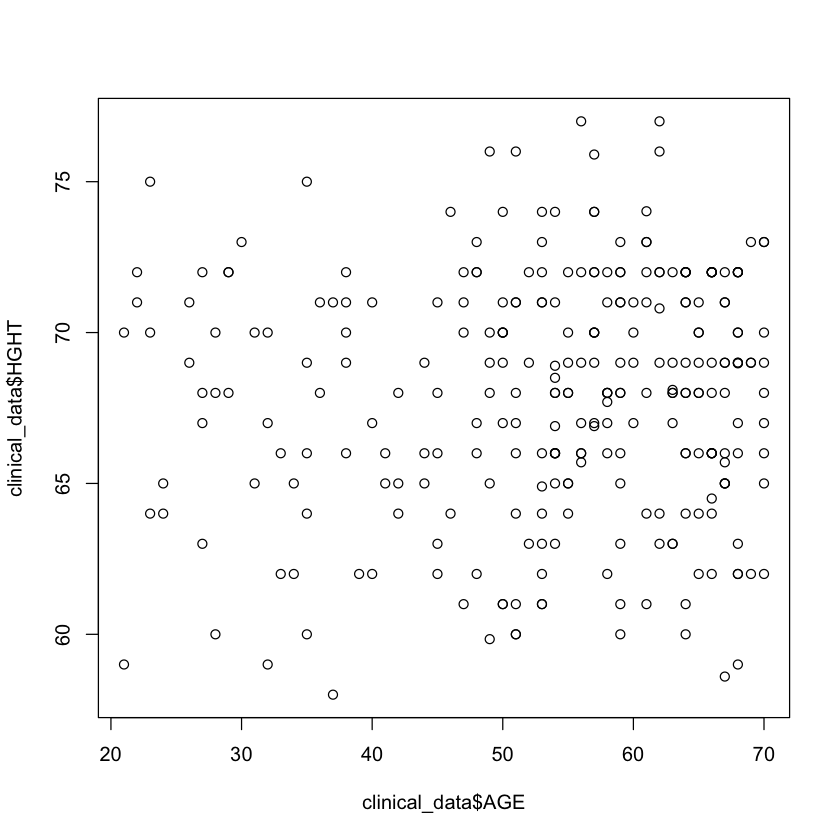

In [35]:
#correlation and scatterplot between continuous variables

plot(clinical_data$AGE, clinical_data$HGHT)
cor(clinical_data$AGE, clinical_data$HGHT)

[1] 0.0973484

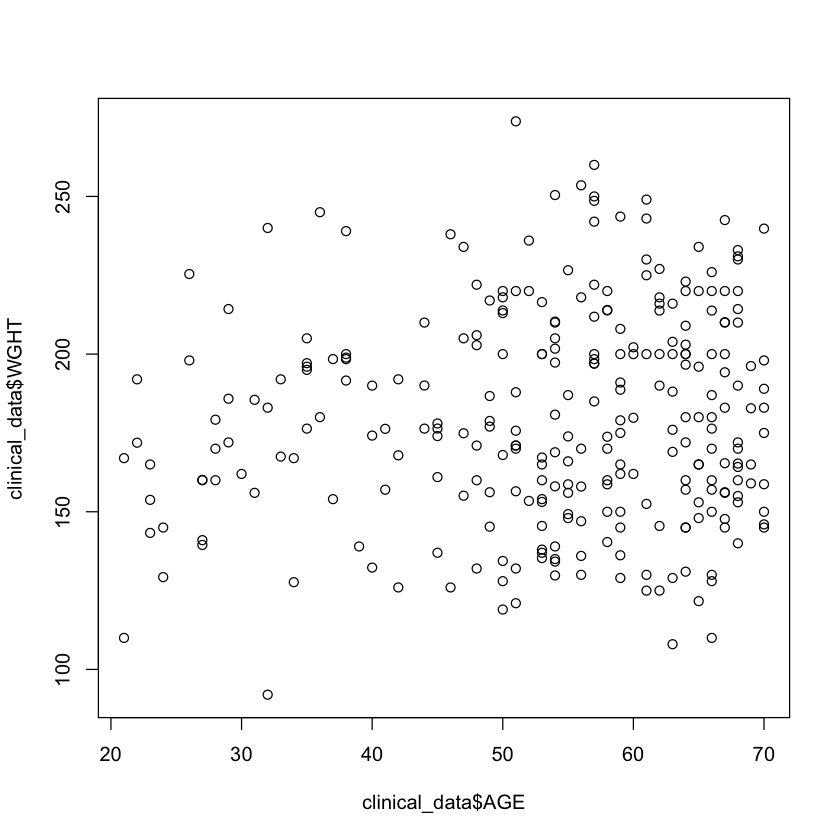

In [36]:
plot(clinical_data$AGE, clinical_data$WGHT)
cor(clinical_data$AGE, clinical_data$WGHT)

[1] 0.6121418

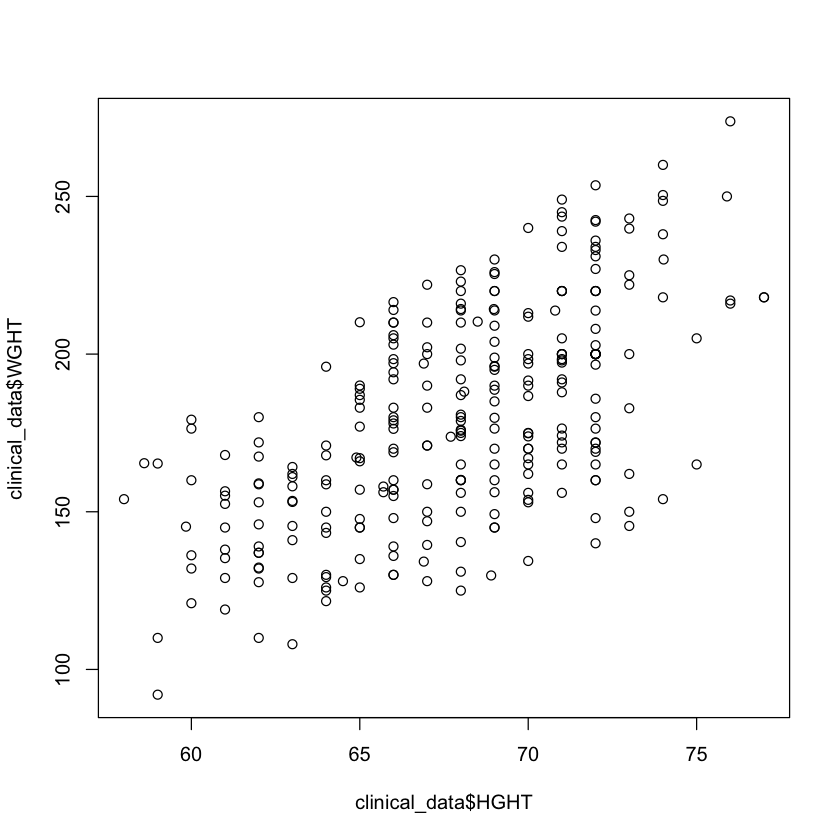

In [37]:
plot(clinical_data$HGHT, clinical_data$WGHT)
cor(clinical_data$HGHT, clinical_data$WGHT)
#correlation between height and weight

             Df Sum Sq Mean Sq F value   Pr(>F)    
COHORT        1   7021    7021   52.01 5.24e-12 ***
Residuals   278  37529     135                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

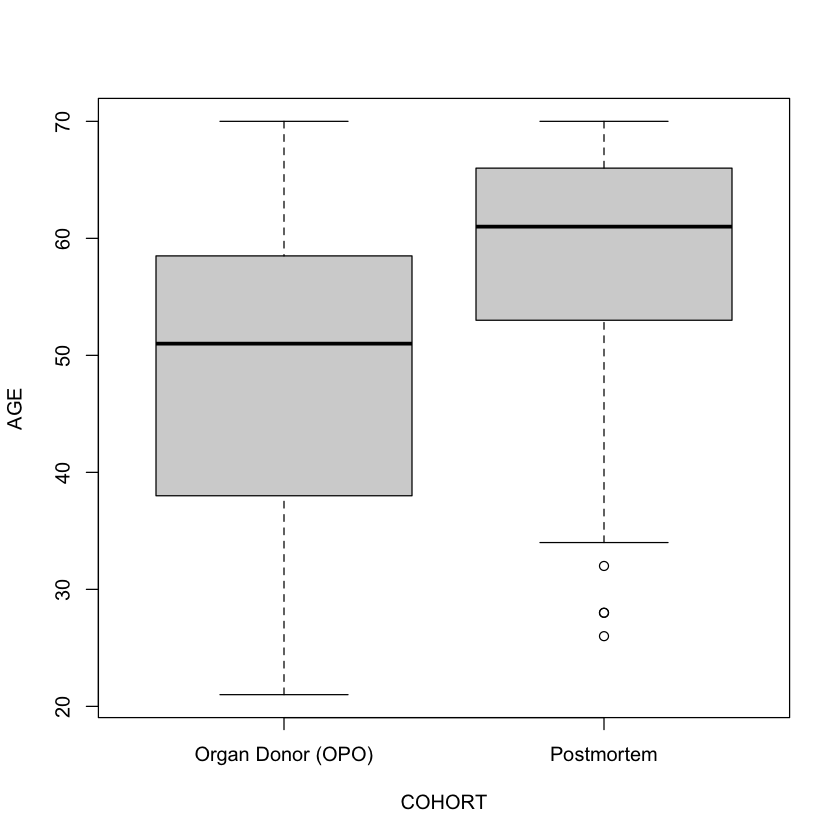

In [42]:
AOVcohort_age = aov(AGE ~ COHORT, data=clinical_data)
summary(AOVcohort_age)
boxplot(AGE ~ COHORT, data=clinical_data)

#seems younger people more likely to be organ donor

             Df Sum Sq Mean Sq F value Pr(>F)  
COHORT        1     82   81.62   5.188 0.0235 *
Residuals   278   4373   15.73                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

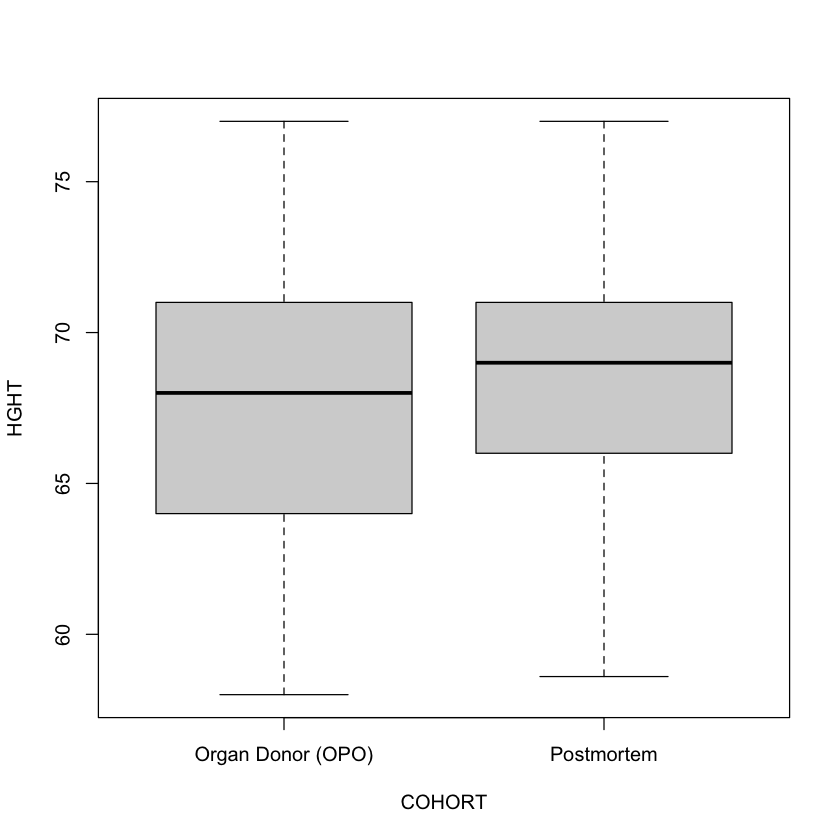

In [43]:
AOVcohort_height = aov(HGHT ~ COHORT, data=clinical_data)
summary(AOVcohort_height)
boxplot(HGHT ~ COHORT, data=clinical_data)

#from boxplot, it seems as though there is a very small relation, even if the p value is under 0.05

             Df Sum Sq Mean Sq F value Pr(>F)  
COHORT        1   4383    4383   3.838 0.0511 .
Residuals   278 317477    1142                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

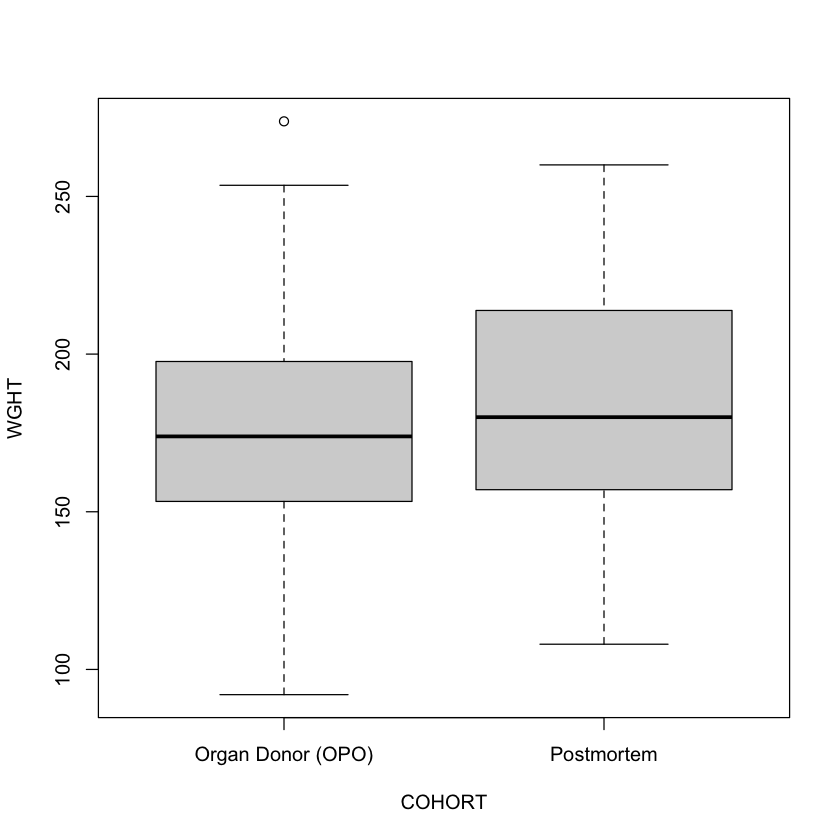

In [44]:
AOVcohort_weight = aov(WGHT ~ COHORT, data=clinical_data)
summary(AOVcohort_weight)
boxplot(WGHT ~ COHORT, data=clinical_data)

#from boxplot, it seems as though there is a very small relation, even if the p value is around 0.05

             Df Sum Sq Mean Sq F value Pr(>F)
COHORT        1      6   6.022   0.363  0.547
Residuals   278   4611  16.588               

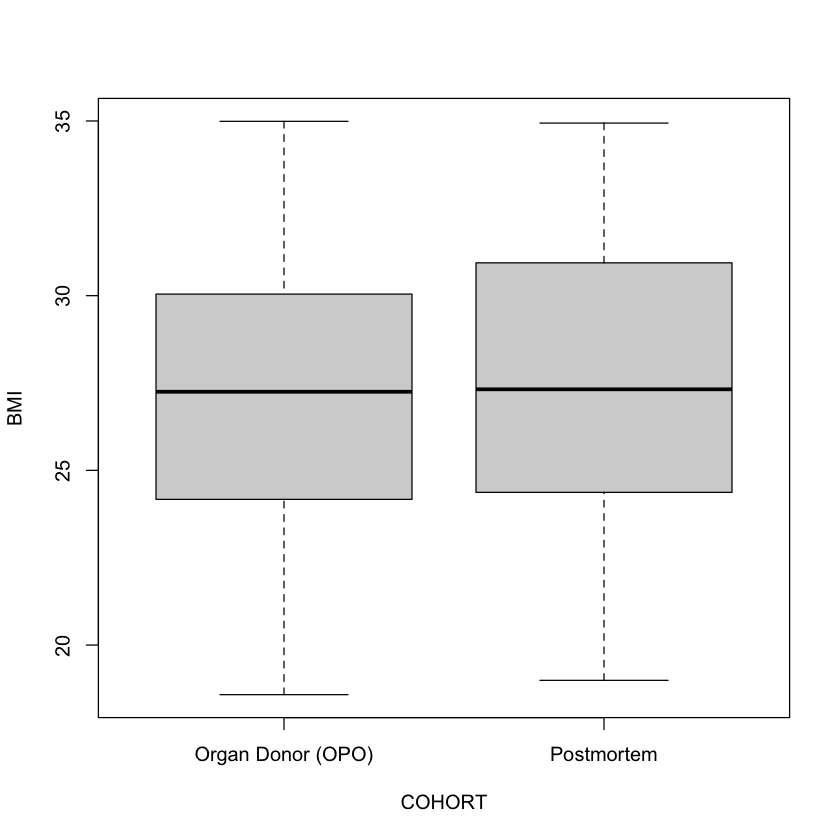

In [45]:
AOVcohort_bmi = aov(BMI ~ COHORT, data=clinical_data)
summary(AOVcohort_bmi)
boxplot(BMI ~ COHORT, data=clinical_data)

#from boxplot, it seems as though there is a very small relation, even if the p value is around 0.05

             Df   Sum Sq  Mean Sq F value Pr(>F)    
COHORT        1 22633790 22633790   315.7 <2e-16 ***
Residuals   278 19932888    71701                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	Shapiro-Wilk normality test

data:  residuals(AOVcohort_TRISCHD)
W = 0.86131, p-value = 3.66e-15



	Kruskal-Wallis rank sum test

data:  TRISCHD by COHORT
Kruskal-Wallis chi-squared = 173.68, df = 1, p-value < 2.2e-16


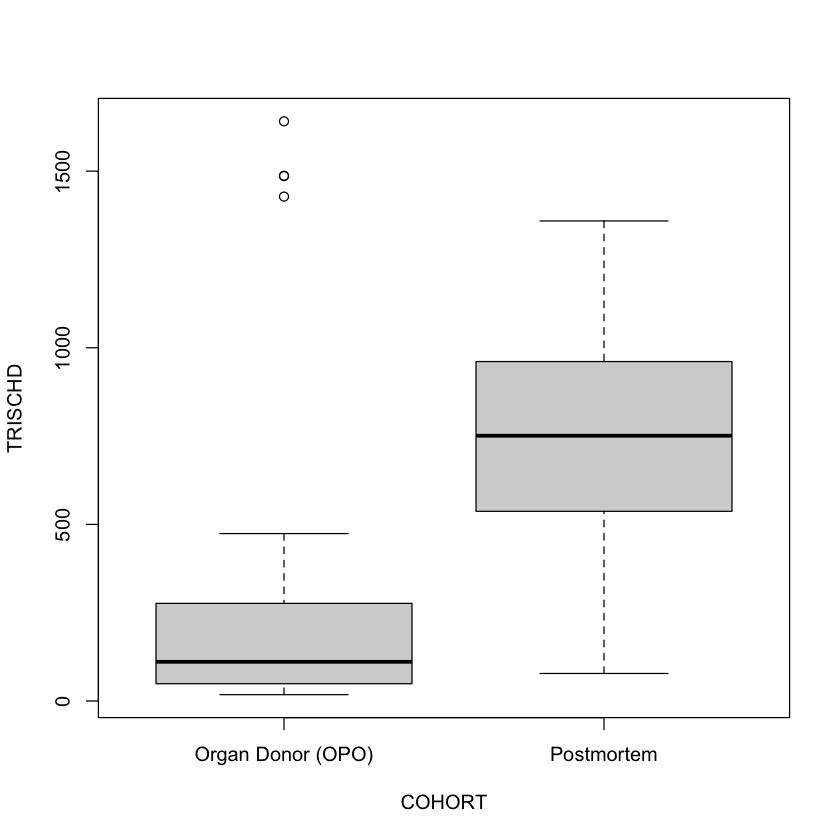

In [50]:
boxplot(TRISCHD ~ COHORT, data=clinical_data)
AOVcohort_TRISCHD = aov(TRISCHD ~ COHORT, data=clinical_data)
summary(AOVcohort_TRISCHD)
shapiro.test(residuals(AOVcohort_TRISCHD))
KWcohort_TRISCHD = kruskal.test(TRISCHD ~ COHORT, data=clinical_data)
KWcohort_TRISCHD
#big effect ! organ donors have much lower TRISCHD as expected

             Df Sum Sq Mean Sq F value   Pr(>F)    
DTHHRDY       4   9161  2290.2    17.8 5.25e-13 ***
Residuals   275  35390   128.7                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	Shapiro-Wilk normality test

data:  residuals(AOVDTHHRDY_AGE)
W = 0.97256, p-value = 3.331e-05



	Kruskal-Wallis rank sum test

data:  AGE by DTHHRDY
Kruskal-Wallis chi-squared = 53.759, df = 4, p-value = 5.912e-11


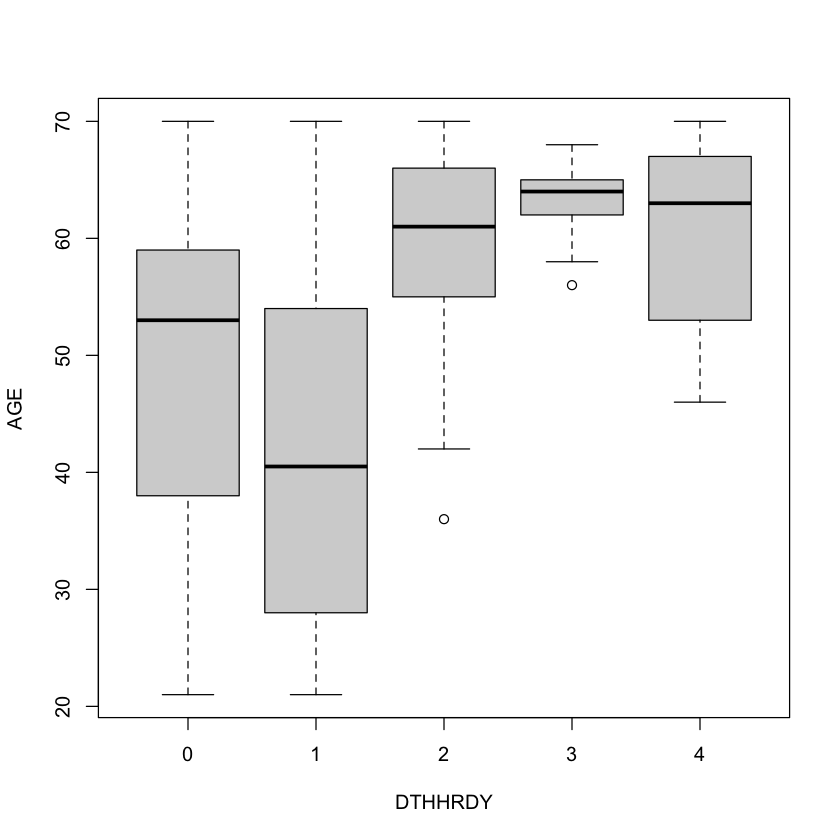

In [54]:
boxplot(AGE ~ DTHHRDY, data=clinical_data)
AOVDTHHRDY_AGE = aov(AGE ~ DTHHRDY, data=clinical_data)
summary(AOVDTHHRDY_AGE)
shapiro.test(residuals(AOVDTHHRDY_AGE))
KWDTHHRDY_AGE = kruskal.test(AGE ~ DTHHRDY, data=clinical_data)
KWDTHHRDY_AGE

#Important ! confounding variable : AGE and DTHHRDY,

In [62]:
clinical_data_pca <- clinical_data[,c(5:8, 10)]
clinical_data_pca_normal <- scale(clinical_data_pca)
clinical_data_pca_normal

AGE,HGHT,WGHT,BMI,TRISCHD
0.66191618,1.03951882,1.39273119,0.842604977,-1.03041896
0.82018820,-0.46203021,0.68612042,1.329310749,-1.13026522
0.97846021,-0.46203021,-0.57989053,-0.376617561,0.86922027
0.82018820,0.78926065,1.18663638,0.818023878,0.95114541
0.34537215,1.03951882,1.18663638,0.609084531,0.78985529
0.97846021,-0.83741747,-1.52203822,-1.406565633,-1.07650185
0.18710013,-0.46203021,-1.28650130,-1.327906115,-0.58495100
0.74105219,-0.21177204,0.59779407,0.975342915,0.77449432
-2.58266015,-2.21383743,-2.05199630,-1.263995256,-1.17378795
0.97846021,-1.46306291,-2.05199630,-1.777740237,0.48519617


In [64]:
corr_matrix <- cor(clinical_data_pca_normal)
corr_matrix

,AGE,HGHT,WGHT,BMI,TRISCHD
AGE,1.00000000,0.064089264,0.0973484,0.071131909,0.22927245
HGHT,0.06408926,1.000000000,0.6121418,-0.006819023,0.14390524
WGHT,0.09734840,0.612141786,1.0000000,0.780945124,0.11913930
BMI,0.07113191,-0.006819023,0.7809451,1.000000000,0.03324977
TRISCHD,0.22927245,0.143905243,0.1191393,0.033249770,1.00000000


In [66]:
data_clinical_data_pca_normal <- princomp(corr_matrix)
summary(data_clinical_data_pca_normal)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4 Comp.5
Standard deviation     0.6222628 0.4489747 0.3375184 0.10193134      0
Proportion of Variance 0.5429983 0.2826797 0.1597517 0.01457022      0
Cumulative Proportion  0.5429983 0.8256780 0.9854298 1.00000000      1

In [68]:
data_clinical_data_pca_normal$loadings[, 1:3]

,Comp.1,Comp.2,Comp.3
AGE,0.3986079,0.29323568,0.63740324
HGHT,-0.2054988,-0.79191688,0.20218667
WGHT,-0.5708766,-0.07623402,0.01067548
BMI,-0.5642637,0.52588868,-0.14258015
TRISCHD,0.3931773,-0.06715621,-0.72965375


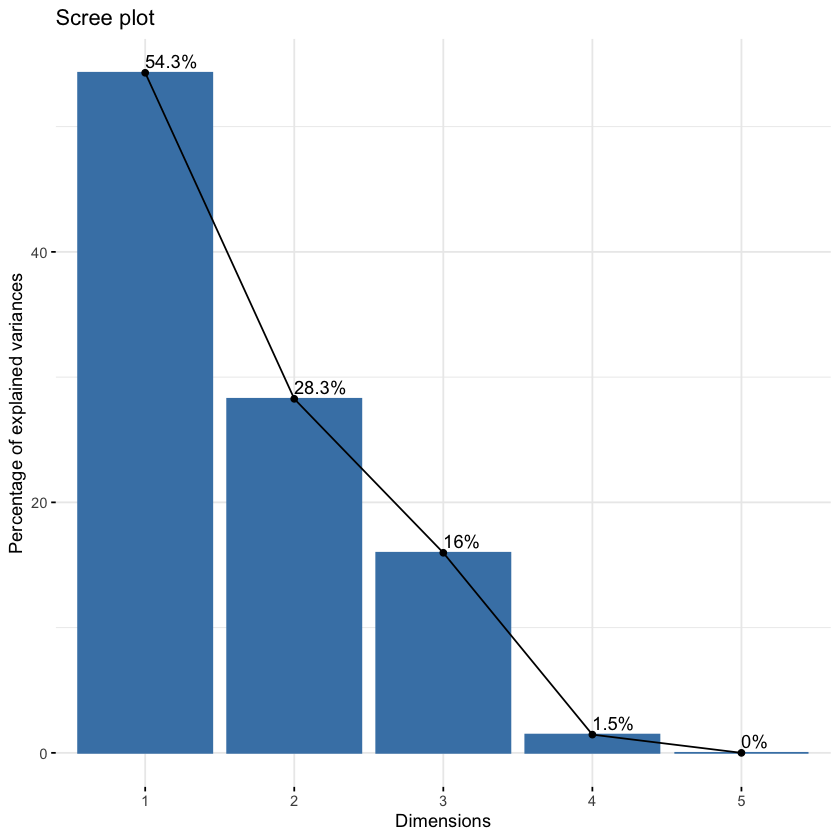

In [78]:
fviz_eig(data_clinical_data_pca_normal, addlabels = TRUE)

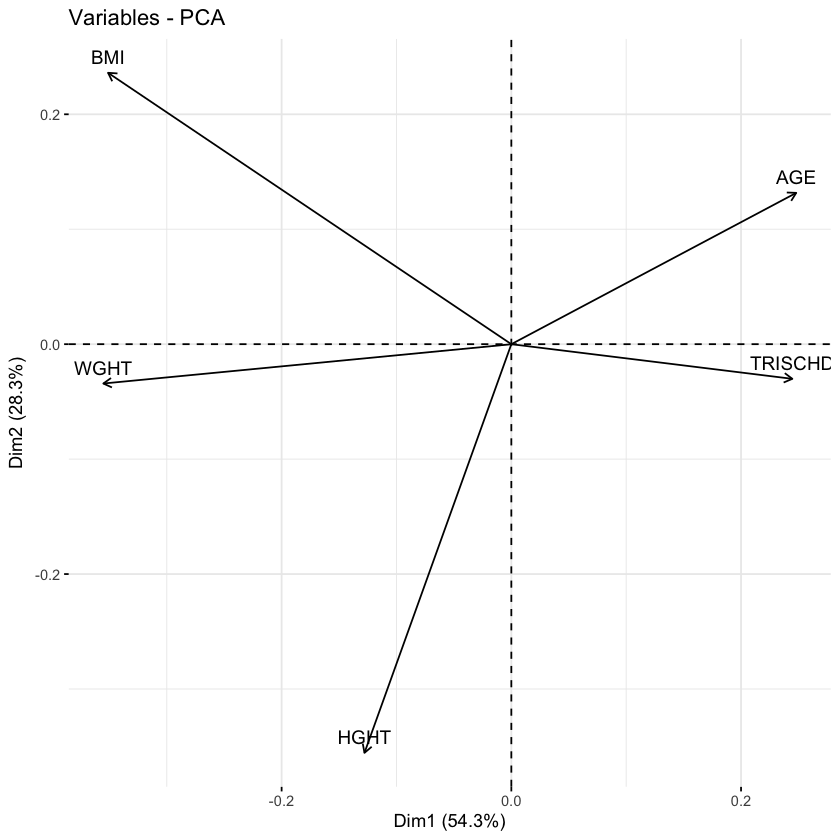

In [79]:
fviz_pca_var(data_clinical_data_pca_normal, col.var = "black")

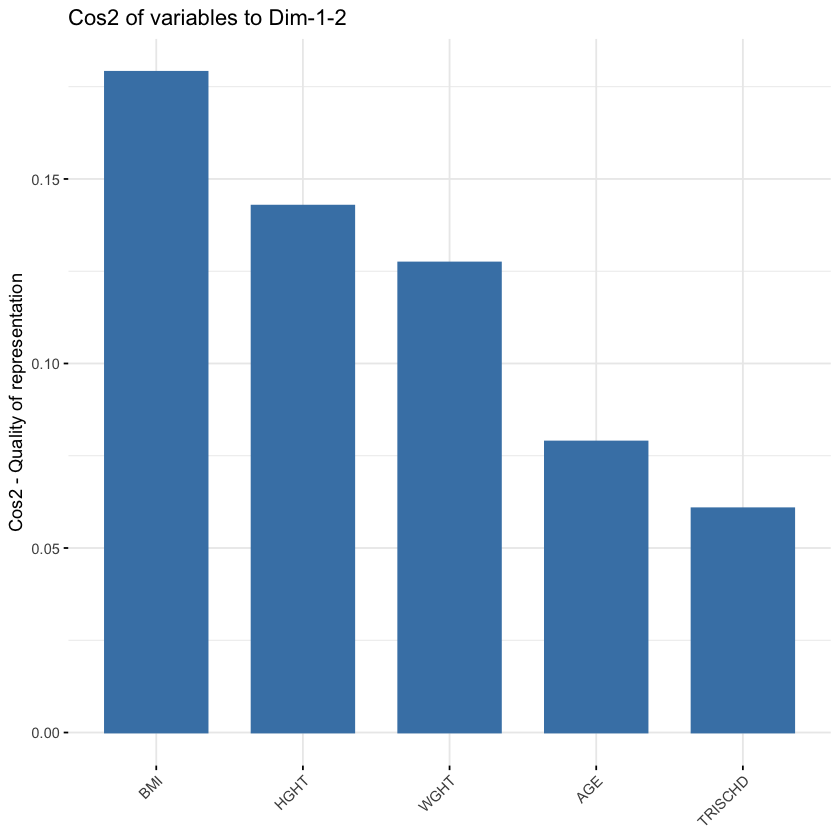

In [80]:
fviz_cos2(data_clinical_data_pca_normal, choice = "var", axes = 1:2)

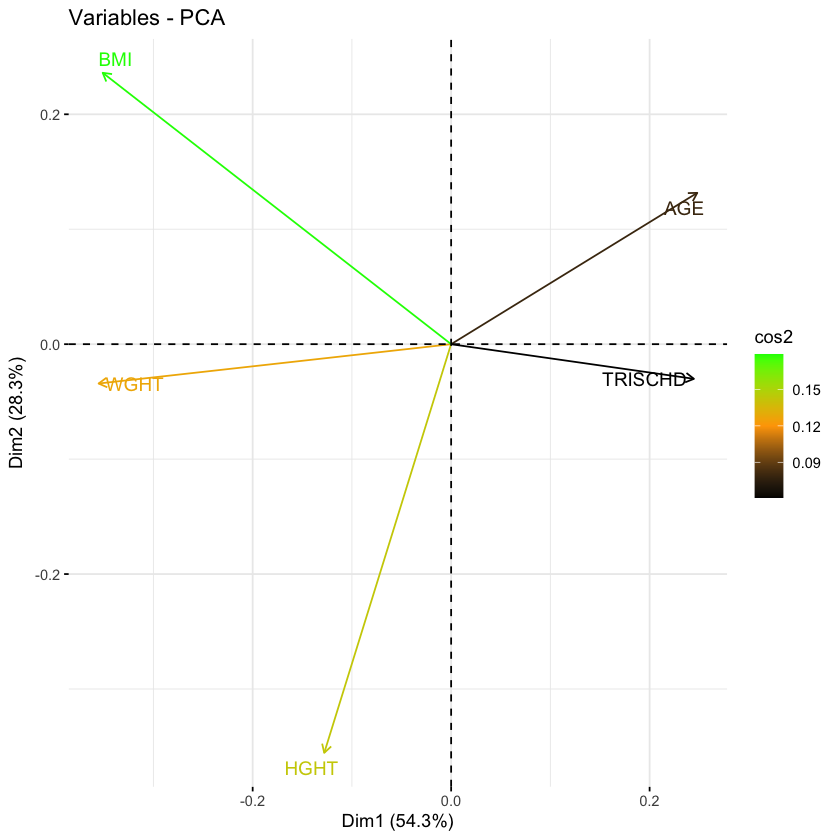

In [81]:
fviz_pca_var(data_clinical_data_pca_normal, col.var = "cos2",
            gradient.cols = c("black", "orange", "green"),
            repel = TRUE)

In [9]:
mopho_counts <- read.table("morphological_counts_lunit_dino.tsv", header = TRUE, sep = "\t")
mopho_counts <- t(mopho_counts)
mopho_counts

SMPLID,GTEX.111YS.0526,GTEX.1122O.1126,GTEX.1128S.0326,GTEX.117XS.0426,GTEX.117YW.0226,GTEX.11DXX.0426,GTEX.11DXZ.0426,GTEX.11DYG.1226,GTEX.11EM3.0226,GTEX.11EMC.0926,⋯,GTEX.1R9K5.1426,GTEX.1R9PM.0326,GTEX.1R9PN.0226,GTEX.1R9PO.0226,GTEX.1RAZA.1126,GTEX.1RAZR.0626,GTEX.1RNTQ.0726,GTEX.1RQED.1126,GTEX.1S3DN.0626,GTEX.1S5ZA.1126
Mophological.cluster.G4_0,137,96,2,339,171,2,1,392,40,260,⋯,2,39,0,77,6,32,5,94,460,1
Mophological.cluster.G4_1,88,880,552,1,0,10,239,18,424,235,⋯,286,34,277,271,537,7,18,228,314,308
Mophological.cluster.G4_2,417,236,211,151,36,258,850,14,605,164,⋯,541,634,333,193,208,2,26,79,43,102
Mophological.cluster.G4_3,1,393,1031,637,791,1558,282,10,135,2,⋯,35,109,339,408,72,24,194,83,7,73
Mophological.cluster.G4_4,1,21,174,1844,1011,850,41,316,94,344,⋯,0,46,260,63,3,184,398,158,2,7
Mophological.cluster.G4_5,32,214,216,473,234,48,206,57,58,313,⋯,412,28,248,78,48,200,10,219,246,95
Mophological.cluster.G4_6,1,1,289,260,162,0,1,742,861,161,⋯,0,52,1277,144,0,1,0,86,36,0
Mophological.cluster.G4_7,1,47,0,3,0,11,370,5,4,1,⋯,4,23,63,115,104,281,4,0,103,118
Mophological.cluster.G4_8,1,39,493,440,54,2491,839,232,11,369,⋯,10,41,1328,524,100,601,12,112,79,4
Mophological.cluster.G4_9,167,291,663,153,129,325,291,123,349,583,⋯,309,268,410,425,84,106,65,154,113,195


In [21]:
metaData <- data.frame(SMPLID=clinical_data$SMPLID, COHORT=clinical_data$COHORT, SEX=clinical_data$SEX, 
                     AGE=clinical_data$AGE, HGHT=clinical_data$HGHT, WGHT=clinical_data$WGHT,
                     BMI=clinical_data$BMI, TRISCHD=clinical_data$TRISCHD, DTHHRDY=clinical_data$DTHHRDY)
metaData

SMPLID,COHORT,SEX,AGE,HGHT,WGHT,BMI,TRISCHD,DTHHRDY
<chr>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<int>,<fct>
GTEX.111YS.0526,Organ Donor (OPO),1,62,72.0,227.00,30.78,74,0
GTEX.1122O.1126,Organ Donor (OPO),2,64,66.0,203.00,32.76,35,0
GTEX.1128S.0326,Postmortem,2,66,66.0,160.00,25.82,816,2
GTEX.117XS.0426,Postmortem,1,64,71.0,220.00,30.68,848,2
GTEX.117YW.0226,Postmortem,1,58,72.0,220.00,29.83,785,3
GTEX.11DXX.0426,Organ Donor (OPO),2,66,64.5,128.00,21.63,56,0
GTEX.11DXZ.0426,Organ Donor (OPO),1,56,66.0,136.00,21.95,248,0
GTEX.11DYG.1226,Postmortem,1,63,67.0,200.00,31.32,779,2
GTEX.11EM3.0226,Organ Donor (OPO),2,21,59.0,110.00,22.21,18,0


In [22]:
library(DESeq2)

In [28]:
dds <- DESeqDataSetFromMatrix(countData = mopho_counts,
                              colData = metaData,
                              design = ~ SEX)



ERROR: Error in DESeqDataSet(se, design = design, ignoreRank): some values in assay are negative


In [25]:
metaData

SMPLID,COHORT,SEX,AGE,HGHT,WGHT,BMI,TRISCHD,DTHHRDY
<chr>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<int>,<fct>
GTEX.111YS.0526,Organ Donor (OPO),1,62,72.0,227.00,30.78,74,0
GTEX.1122O.1126,Organ Donor (OPO),2,64,66.0,203.00,32.76,35,0
GTEX.1128S.0326,Postmortem,2,66,66.0,160.00,25.82,816,2
GTEX.117XS.0426,Postmortem,1,64,71.0,220.00,30.68,848,2
GTEX.117YW.0226,Postmortem,1,58,72.0,220.00,29.83,785,3
GTEX.11DXX.0426,Organ Donor (OPO),2,66,64.5,128.00,21.63,56,0
GTEX.11DXZ.0426,Organ Donor (OPO),1,56,66.0,136.00,21.95,248,0
GTEX.11DYG.1226,Postmortem,1,63,67.0,200.00,31.32,779,2
GTEX.11EM3.0226,Organ Donor (OPO),2,21,59.0,110.00,22.21,18,0
